In [64]:
pip install --user shap


Note: you may need to restart the kernel to use updated packages.


In [65]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import shap

#untuk uji statistik
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu

#untuk visualisasi
import plotly.express as px

# train test split
from sklearn.model_selection import train_test_split

# menyatukan beberapa tahap preprocessing atau fungsi lainnya
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

#untuk mengecek VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# encoder dan scaler
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

# resampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE

# algoritma ML
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# cross validation untuk menentukan algoritma terbaik
from sklearn.model_selection import cross_val_score, StratifiedKFold

# metrics untuk klasifikasi
from sklearn.metrics import f1_score, classification_report, confusion_matrix, precision_recall_curve,recall_score,precision_score
from sklearn.metrics import  ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, roc_curve, PrecisionRecallDisplay, RocCurveDisplay, auc
from sklearn.metrics import fbeta_score, make_scorer


# Ensemble various type
from sklearn.ensemble import VotingClassifier, StackingClassifier

# Ensemble similar type
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier      # Bagging
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier # Boosting
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

## **Latar Belakang**
Bank yang berada di Amerika Serikat menyediakan jasa untuk memberikan pinjaman dan deposit kepada customer. Bank ingin agar team telemarketing melakukan marketing campaign agar mendapatkan customer yang ingin melakukan deposito berjangka.


 Deposito berjangka adalah salah satu produk perbankan dimana nasabah menyetorkan sejumlah uang untuk disimpan dalam kurun waktu yang lama di bank.

Dalam konteks perbankan di negara Amerika Serikat, deposito berjangka sering disebut sebagai "Certificate of Deposit" (CD). CD merupakan produk perbankan yang mirip dengan deposito berjangka di negara lain.

Berikut ini adalah beberapa kriteria mengenai deposito berjangka (CD) di Amerika Serikat:

- Suku Bunga Tetap: CD menawarkan suku bunga tetap yang disepakati pada awal penempatan. Suku bunga ini akan berlaku selama jangka waktu penempatan CD.

- Jangka Waktu: Anda dapat memilih jangka waktu penempatan CD, mulai dari beberapa bulan hingga beberapa tahun. Beberapa jangka waktu umum yang ditawarkan adalah 3 bulan, 6 bulan, 1 tahun, 2 tahun, 5 tahun, dan lain sebagainya.

- Keamanan: Deposito berjangka (CD) di Amerika Serikat biasanya diasuransikan oleh Federal Deposit Insurance Corporation (FDIC) hingga batas tertentu. Hal ini memberikan perlindungan kepada nasabah jika terjadi kegagalan bank.

- Penalti Prematur: Jika Anda memilih untuk menarik dana sebelum jangka waktu penempatan CD berakhir, Anda mungkin akan dikenakan penalti prematur. Besaran penalti ini bervariasi antara bank-bank yang berbeda dan tergantung pada jangka waktu dan jumlah dana yang ditarik.

- Rollover dan Perpanjangan: Setelah jangka waktu penempatan CD berakhir, Anda biasanya memiliki opsi untuk memperpanjang CD dengan suku bunga yang sama atau mengambil dana yang dihasilkan bersama bunga.

- Pembayaran Bunga: Bunga yang dihasilkan dari CD dapat dibayarkan secara periodik, misalnya setiap bulan, setiap tiga bulan, atau secara akhir jangka waktu penempatan.



## Problem 

Bank ingin menawarkan produk deposito kepada Customer. Maka dari itu, perusahaan ingin agar team telemarketing bank untuk melakukan marketing campaign. Marketing campaign memegang peranan yang krusial dalam menentukan customer akan melakukan deposit. Jika team telemarketing melakukan campaign yang dapat menarik minat customer dengan berbagai benefit yang diberikan, Maka customer akan tertarik untuk melakukan deposit. 

Selama ini bank masih belum mendapatkan profit yang optimal dan bank berharap dapat meningkatkan profit dengan bantuan model machine learning yang dapat membantu team telemarketing agar profit yang didapatkan paling optimal. 

Agar bank mendapatkan customer yang ingin melakukan deposit dan memaksimalkan campaign perusahaan harus mengidentifikasi customer dengan kriteria dan target yang sesuai agar dapat melalukan deposit. Maka tugas saya sebagai data scientist adalah membantu team telemarketing yang akan melakukan marketing campaign untuk menemukan kriteria customer yang akan melakukan deposit dan melakukan prediksi dengan data yang tersedia. 



- https://www.glassdoor.com/Hourly-Pay/U-S-Bank-Telemarketing-Hourly-Pay-E8937_D_KO9,22.htm
- https://www.forbes.com/advisor/banking/cds/us-bank-cd-rates/
- https://sikapiuangmu.ojk.go.id/FrontEnd/CMS/Category/121#:~:text=Deposito%20adalah%20simpanan%20yang%20pencairannya,dicairkan%20setelah

Biaya promosi bank mencakup gaji seorang telemarketing dan biaya pulsa untuk menghubungi customer.Biaya yang dikeluarkan oleh seorang telemarketing untuk menghubungi customer adalah sebesar $ 7 dollar.
Maka :
- Biaya yang dikeluarkan untuk menghubungi satu customer : $7 
- Gaji seorang telemarketing persatu customer: $18
Maka total biaya marketing yang dikeluarkan adalah $25 


Untuk Customer yang ingin melakukan deposit. Misalkan customer melakukan deposit sebesar $500 dan akan diambil bunga sebesar 0,25%. Maka keuntungan yang diperoleh oleh bank atas customer baru yang melakukan deposit adalah sebesar $125. 

- FP:  Customer diprediksi untuk melakukan deposit, Padahal Customer kenyataanya tidak melakukan deposit,
Jika seorang customer diprediksi melakukan desposit padahal kenyataanya tidak melakukan deposit maka perusahaan akan mengalami kerugian marketing campaign sebesar $25.
<br><br>

- FN: Customer diprediksi tidak melakukan deposit, Padahal pada kenyataannya customer melakukan deposit
Kalau customer tidak diprediksi akan melakukan deposit maka perusahaan tidak melakukan marketing pada customer. Namun perusahaan mengalami kerugian karena kehilangan customer potensial yang akan melakukan deposit sebesar $125.

- TP :  Customer diprediksi melakukan deposit dan sesuai pada kenyataannya memang Customer melakukan deposit. Jika customer diprediksi melakukan deposit dan pada kenyatannya customer melakukan deposit Maka bank mengeluarkan $25 untuk melakukan marketing campaign kepada customer dan mendapatkan keuntungan untuk melakukan deposit sebesar $125. Maka keuntungan yang diperoleh adalah $100.  

- TN : Customer diprediksi tidak melakukan deposit dan sesuai pada kenyataanya memang Customer tidak melakukan deposit. 
Jika Customer diprediksi tidak melakukan deposit Maka bank tidak mengeluarkan biaya marketing dan bank tidak mendapatkan keuntungan dari deposito customer. 

Metrics yang digunakan untuk penilaian ini adalah f2 score karena kita ingin yang memberi bobot yang lebih tinggi pada false negative daripada false positive( dengan tetap tidak ingin melakukan marketing yang sia-sia). Karena keuntungan yang didapatkan jika customer melakukan deposito > biaya marketing campaign. 



Sebelum menggunakan model machine learning,Seandainya jumlah total customer sebanyak 1548 dianggap diberikan marketing campaign dengan harapan 1548 customer akan melakukan deposit. Customer yang tidak melakukan deposit (kelas 0): 805 customer dan Customer yang melakukan deposit(kelas 1): 743.


Gambar dibawah ini merupakan kondisi awal dimana semua customer akan diberikan marketing campaign , dan diprediksi akan melakukan deposit. 

- Maka cost awalnya adalah:
    - $25 x 1548 = $38.700
- Keuntungan yang didapat dari deposito :
    - $125 x 743 = $92.785

Maka keuntungan yang didapat dari deposito customer dikurang dengan cost marketing: $54.085

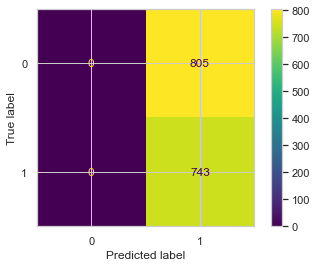

In [66]:
from PIL import Image
from IPython.display import display


image = Image.open("output.png")  


display(image)

# 1. Data Understanding

Terdapat 11 kolom pada data dengan keterangan sebagai berikut:



Header | Definition
---|---------
`Age`| Umur dari customer
`Job` | Pekerjaan dari customer
`Housing` | Apakah customer memiliki housing loan
`Loan` | Apakah customer memiliki personal loan 
`Balance` |Jumlah uang pada rekening customer
`Contact` | Alat komunikasi yang digunakan oleh telemarketimg untuk menghubungi customer
`Month` |  Bulan terakhir customer dihubungi oleh  telemarketing
`Campaign` | Jumlah campaign yang dilakukan oleh telemarketing
`Pdays` | Jumlah hari sejak hari terakhir customer dihubungi oleh telemarketing
`Poutcome` | Hasil dari campaign terakhir yang dilakukan oleh telemarketing
`Deposit` | Apakah customer melakukan deposit atau tidak


- Baris pada data bank_marketing_campaign ini merepresentasikan tiap customer dari bank.
- Campaign disini merupakan campaign yang dilakukan untuk menawarkan produk lain, dan bukan produk deposito berjangka.

# 1. Load Dataset
Pertama-tama kita akan load dataset dan data ini berisi 7813 baris dan 11 kolom

In [67]:
df = pd.read_csv('data_bank_marketing_campaign.csv')
df

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


In [68]:
df[df['pdays']==-1]

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
5,41,admin.,-76,yes,no,cellular,apr,1,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7807,33,management,0,yes,yes,cellular,may,2,-1,unknown,no
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


-  Dapat kita lihat bahwa terdapat 5817 customer dengan value pdays = -1, pdays ini merupakan waktu terakhir sejak telemarketing menghubungi customer.Nilai ini seharusnya tidak negatif.Nilai -1 akan  dianggap sebagai customer yang melakukan konfirmasi akan melakukan deposit di hari yang sama dengan hari customer tersebut melalukan deposit , maka akan direplace dengan angka 0 untuk setiap nilai pdays=-1 .


In [69]:
#kita akan mengganti nilai -1 pada pdays dengan 0
df['pdays'] = df['pdays'].replace(-1, 0)

- Terdapat juga data customer yang memiliki balance pada account < 0. Kita akan mengecek customer yang memiliki balance < 0 dan apakah customer tersebut memiliki loan dan housing. 

In [70]:
df[df['balance']<0][['housing','loan']].value_counts()

housing  loan
yes      no      260
         yes      98
no       no       65
         yes      56
dtype: int64

- Tidak mungkin seorang customer memiliki balance yang minus namun tidak memiliki loan dan housing. Maka kolom dengan balance < 0, loan = 'no' dan housing = 'no' akan di drop

In [71]:
#kita akan mengganti kolom dataframe df dengan menghapus data customer balance < 0 yang tidak memiliki housinhg dan loan
df = df[~((df['housing'] == 'no') & (df['loan'] == 'no') & (df['balance'] < 0))]


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7748 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7748 non-null   int64 
 1   job       7748 non-null   object
 2   balance   7748 non-null   int64 
 3   housing   7748 non-null   object
 4   loan      7748 non-null   object
 5   contact   7748 non-null   object
 6   month     7748 non-null   object
 7   campaign  7748 non-null   int64 
 8   pdays     7748 non-null   int64 
 9   poutcome  7748 non-null   object
 10  deposit   7748 non-null   object
dtypes: int64(4), object(7)
memory usage: 726.4+ KB


- Tidak terdapat nilai null atau nan values dalam feature-feature pada data demikian juga pada kolom deposit yang akan menjadi target. 

In [73]:
df.describe()

,age,balance,campaign,pdays
count,7748.000000,7748.000000,7748.000000,7748.000000
mean,41.245354,1527.023748,2.514713,52.400749
std,11.928667,3098.055490,2.725829,107.828660
min,18.000000,-6847.000000,1.000000,0.000000
25%,32.000000,133.000000,1.000000,0.000000
50%,39.000000,557.500000,2.000000,0.000000
75%,49.000000,1694.000000,3.000000,52.000000
max,95.000000,66653.000000,63.000000,854.000000


insight :
- range umur rata-rata tersebar pada range 32-49. Umur minimum customer adalah 18 tahun dan umur maksimum customer adalah 95 tahun 
- Balance dari customer tersebar pada range $133-$1694. Balance maksimum adalah sebesar $66653 dan Balance minimum adalah sebesar -$6847
- Jumlah campaign tersebar dari 1-3 kali. Dengan campaign paling banyak dilakukan sebanyak 63 kali. 
- 50% dari kolom pdays yang mengacu pada waktu terakhir sejak telemarketing menghubungi customer memiliki nilai 0(angka 0 berarti customer melakukan konfirmasi untuk melakukan deposit/tidak di hari yang sama dengan hari telemarketing menghubungi customer)
- Customer rata-rata langsung melakukan deposit di hari yang sama sejak hari terakhir customer dihubungi (mengacu pada kolom pdays). Namun ada customer yang melakukan deposit 854 hari setelah dihubungi oleh telemarketing 


# 2. Data Understanding(EDA)

In [74]:
# unique values in categorical columns

for i in df.describe(include='object').columns:
    print(i, '\n', df[i].unique(), '\n')

job 
 ['admin.' 'self-employed' 'services' 'housemaid' 'technician' 'management'
 'student' 'blue-collar' 'entrepreneur' 'retired' 'unemployed' 'unknown'] 

housing 
 ['no' 'yes'] 

loan 
 ['no' 'yes'] 

contact 
 ['cellular' 'telephone' 'unknown'] 

month 
 ['jun' 'apr' 'may' 'nov' 'jan' 'sep' 'feb' 'mar' 'aug' 'jul' 'oct' 'dec'] 

poutcome 
 ['unknown' 'other' 'failure' 'success'] 

deposit 
 ['yes' 'no'] 



- Terdapat tujuh kolom kategorikal pada data:
1) Kolom job memiliki 12 unique values yang menunjukkan tipe-tipe job yaitu : 
 ['admin.' 'self-employed' 'services' 'housemaid' 'technician' 'management'
 'student' 'blue-collar' 'entrepreneur' 'retired' 'unemployed' 'unknown'] 
2) Kolom housing memiliki 2 unique values yaitu : no (tidak memiliki housing loan) dan yes(memiliki housing loan)
3) kolom contact memiliki 3 unique values yaitu : cellular , telephone dan unkown 
4) kolom month memiliki 12 unique values yaitu bulan ['jun' 'apr' 'may' 'nov' 'jan' 'sep' 'feb' 'mar' 'aug' 'jul' 'oct' 'dec'] 
5) kolom poutcome memiliki 4 unique values yang menjunjukkan kesuksesan yaitu failure, success, unkown dan other
6) kolom deposit memiliki 2 unique values yaitu no (tidak melakukan deposit) dan yes(melakukan deposit)

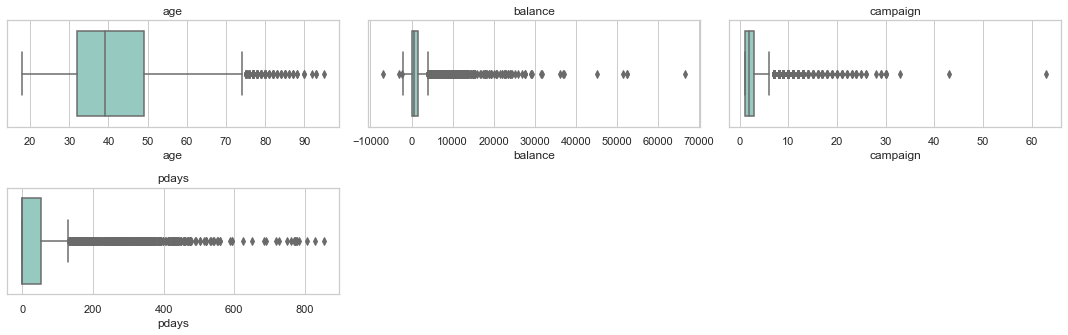

In [75]:
# feature numerical pada data
num_feature = [fea for fea in df.describe().columns]
num_feature

plt.figure(figsize=(15, 9), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1
    
for feature in num_feature:
    ax = plt.subplot(4,3, plotnumber)
    sns.boxplot(x=feature, data=df);
    plt.title(feature, fontsize=12)
    plt.tight_layout()
    plotnumber += 1

insight :
- Distribusi untuk kolom age, balance, campaign dan pdays adalah right skewed distribution 
- terdapat outlier pada kolom age, balance, campaign, pdays 
- utuk age > 70 dianggap outlier 
- Outlier tidak kita drop pada kolom age balance campaign dan pdays dikarenakan hal berikut:
    - Age yang > 70 dan customer ini melakukan deposit adalah wajar karena banyak nasabah yang berumur tinggi memiliki deposit atau menyimpan uang untuk hari tua 
    - Balance yang bervariasi ada yang tinggi sekali dan rendah sekali merupakan hal yang wajar tergantung dari jumlah uang yang ingin disimpan oleh customer dalam rekening, ataupun jumlah hutang yang dimiliki oleh customer.
    - Jumlah campaign yang rendah maupun tinggi adalah hal yang wajar, Biasanya nasabah yang memiliki potensi tinggi akan melakukan deposit akan diberikan marketing campaign yang sangat sering ataupun bahkan terus menerus dari waktu ke waktu 
    - Jumlah waktu sejak marketing campaign terakhir ada yang sampai > 800 merupakan hal yang wajar. Hal ini bisa menjadi salah satu kelalaian dari tim telemarketing yang terlewat untuk menghubungi nasabah ataupun nasabah ini dianggap pasti akan melakukan deposit atau dianggap bukan nasabah yang potensial jadi tidak perlu dihubungi dalam waktu dekat. 

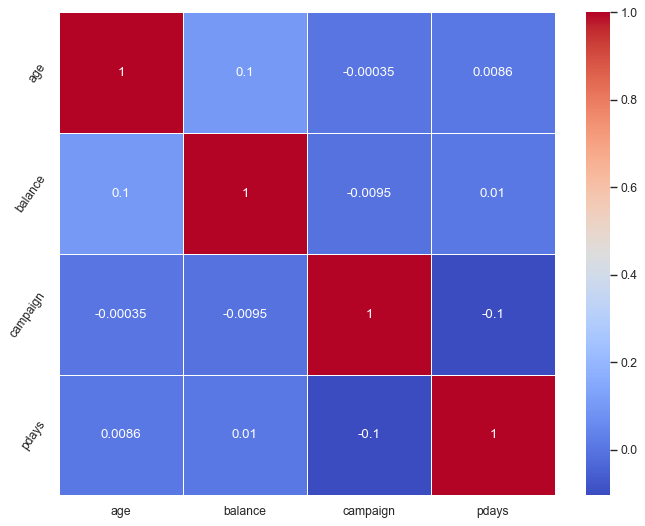

In [76]:
# Pisahkan kolom numerik dan kategorikal
kolom_numerik = df.select_dtypes(include='number')
kolom_kategorikal = df.select_dtypes(include='object')

# Hitung matriks korelasi untuk kolom numerik
matriks_korelasi = kolom_numerik.corr()

# Plot matriks korelasi menggunakan heatmap
plt.figure(figsize=(10, 8), dpi=80)
sns.heatmap(matriks_korelasi, cmap='coolwarm', annot=True, linewidth=0.5)
plt.yticks(rotation=55)

# Tampilkan plot
plt.show()

- karena saya akan mencoba  menggunakan model logistic regression, maka saya ingin agar antar feature tidak terjadi multicolinearity
- Bedasarkan gambar diatas, tidak ada feature yang memiliki nilai multicolinearity yang tinggi
Multicolinearity berada pada range -1 < i < 1 , i=multicolinearity
- Karena variabel numerikal pada data yaitu age, balance, campaign dan pdays tidak memiliki multicolinearity yang tinggi, Maka saya dapat mencoba untuk menggunakan Logistic Regression

In [77]:
#mengecek apakah terdapat duplikat pada data 
df.duplicated().sum()

8

- Terdapat 8 baris yang duplikat pada data, Maka akan kita drop duplikat ini.

In [78]:
#drop duplikat pada data (untuk mencegah adanya bias ketika melakukan proses training pada model machine learning)
df = df.drop_duplicates()
df

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,0,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,0,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,0,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,0,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,0,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,0,unknown,no


In [79]:

# Mengelompokkan data bedasarkan job dan deposit
grouped_data = df.groupby(['job', 'deposit'])['deposit'].count().unstack()

# Menghitung persentase
grouped_data['total'] = grouped_data.sum(axis=1)
grouped_data['yes_percentage'] = grouped_data['yes'] / grouped_data['total'] * 100
grouped_data['no_percentage'] = grouped_data['no'] / grouped_data['total'] * 100

# Reset index
grouped_data = grouped_data.reset_index()

# Membuat stacked bar plot
fig = px.bar(grouped_data, x='job', y=['yes_percentage', 'no_percentage'],
             title='Deposit Outcome bedasarkan job', barmode='stack')

# Set y-axis label
fig.update_yaxes(title_text='Percentage')


fig.show()








- Kategori job student, retired dan unemployed memiliki persentase melakukan deposit paling banyak dibandingkan dengan job lainnya 
- Kategori job services , bluecollar, housemaid memiliki persentase tidak melakukan deposit yang paling besar dibandingkan dengan job lainnya dengan proporsi deposit terendah

- Berikut ini adalah tes statistik untuk menampilkan bahwa ada hubungan yang signifikan antara job dengan deposit
- Kita akan menggunakan chi square test karena data yang akan digunakan adalah data kategorikal dengan kategorikal

In [80]:
from scipy.stats import chi2_contingency

# Membuat tabel kontingensi
tabel_kontingensi = pd.crosstab(df['job'], df['deposit'])

# Melakukan uji chi-square
statistik_chi2, p_value, _, _ = chi2_contingency(tabel_kontingensi)

# Menampilkan hasil
print("Statistik chi-square:", statistik_chi2)
print("Nilai p:", p_value)

# Menampilkan hipotesis
alpha = 0.05
if p_value < alpha:
    print("Hipotesis nol (H0) ditolak. Terdapat hubungan yang signifikan antara variabel 'job' dan 'deposit'.")
    print("Hipotesis alternatif (H1) diterima.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol (H0). Tidak terdapat hubungan yang signifikan antara variabel 'job' dan 'deposit'.")


Statistik chi-square: 266.0590033414606
Nilai p: 1.2015982318336204e-50
Hipotesis nol (H0) ditolak. Terdapat hubungan yang signifikan antara variabel 'job' dan 'deposit'.
Hipotesis alternatif (H1) diterima.


In [81]:
# Mengelompokkan data bedasarkan bulan dan deposit
grouped_data = df.groupby(['month', 'deposit'])['deposit'].count().unstack()

# Menghitung persentase
grouped_data['total'] = grouped_data.sum(axis=1)
grouped_data['yes_percentage'] = grouped_data['yes'] / grouped_data['total'] * 100
grouped_data['no_percentage'] = grouped_data['no'] / grouped_data['total'] * 100

# Reset index
grouped_data = grouped_data.reset_index()

# Membuat stacked bar plot
fig = px.bar(grouped_data, x='month', y=['yes_percentage', 'no_percentage'],
             title='Deposit Outcome bedasarkan Month', barmode='stack')

# Set y-axis label
fig.update_yaxes(title_text='Percentage')


fig.show()

- Bulan maret, desember, oktober, dan septemner merupakan bulan dengan junmlah persentase deposit yang paling banyak dibandingkan dengan bulan lainnya
- Persentase deposit yang paling sedikit terjadi pada bulan Mei (hanya 33.38422% customer yang melakukan deposit).

- Kita juga akan melakukan chi square test untuk menguji apakah ada hubungan yang signifikan antara month dan deposit

In [82]:
from scipy.stats import chi2_contingency

# Membuat tabel kontingensi
tabel_kontingensi = pd.crosstab(df['month'], df['deposit'])

# Melakukan uji chi-square
statistik_chi2, p_value, _, _ = chi2_contingency(tabel_kontingensi)

# Menampilkan hasil
print("Statistik chi-square:", statistik_chi2)
print("Nilai p:", p_value)

# Menampilkan hipotesis
alpha = 0.05
if p_value < alpha:
    print("Hipotesis nol (H0) ditolak. Terdapat hubungan yang signifikan antara variabel 'month' dan 'deposit'.")
    print("Hipotesis alternatif (H1) diterima.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol (H0). Tidak terdapat hubungan yang signifikan antara variabel 'month' dan 'deposit'.")


Statistik chi-square: 712.3913502868141
Nilai p: 1.1896845857401582e-145
Hipotesis nol (H0) ditolak. Terdapat hubungan yang signifikan antara variabel 'month' dan 'deposit'.
Hipotesis alternatif (H1) diterima.


In [83]:
# Mengelompokkan data bedasarkan housing dan deposit
grouped_data = df.groupby(['housing', 'deposit'])['deposit'].count().unstack()

# Menghitung persentase
grouped_data['total'] = grouped_data.sum(axis=1)
grouped_data['yes_percentage'] = grouped_data['yes'] / grouped_data['total'] * 100
grouped_data['no_percentage'] = grouped_data['no'] / grouped_data['total'] * 100

# Reset the index 
grouped_data = grouped_data.reset_index()

# Membuat stacked bar plot
fig = px.bar(grouped_data, x='housing', y=['yes_percentage', 'no_percentage'],
             title='Deposit Outcome bedasarkan housing', barmode='stack')

# Set y-axis label
fig.update_yaxes(title_text='Percentage')


fig.show()

- Customer yang tidak memiliki housing loan memiliki persentase deposit yang lebih besar yaitu sebesar 58,31491% Sedangkan untuk customer yang memiliki housing loan hanya sekitar 36.57672%  yang melakukan deposit. 
- Customer yang tidak memiliki housing loan cenderung untuk melakukan deposit. 

- Kita juga akan melakukan chi square test untuk menguji apakah ada hubungan yang signifikan antara housing dan deposit

In [84]:
from scipy.stats import chi2_contingency

# Membuat tabel kontingensi
tabel_kontingensi = pd.crosstab(df['housing'], df['deposit'])

# Melakukan uji chi-square
statistik_chi2, p_value, _, _ = chi2_contingency(tabel_kontingensi)

# Menampilkan hasil
print("Statistik chi-square:", statistik_chi2)
print("Nilai p:", p_value)

# Menampilkan hipotesis
alpha = 0.05
if p_value < alpha:
    print("Hipotesis nol (H0) ditolak. Terdapat hubungan yang signifikan antara variabel 'housing' dan 'deposit'.")
    print("Hipotesis alternatif (H1) diterima.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol (H0). Tidak terdapat hubungan yang signifikan antara variabel 'housing' dan 'deposit'.")


Statistik chi-square: 364.47423198661863
Nilai p: 2.9877845229902185e-81
Hipotesis nol (H0) ditolak. Terdapat hubungan yang signifikan antara variabel 'housing' dan 'deposit'.
Hipotesis alternatif (H1) diterima.


In [85]:
# Mengelompokkan data bedasarkan loan dan deposit
grouped_data = df.groupby(['loan', 'deposit'])['deposit'].count().unstack()

# Menghitung persentase
grouped_data['total'] = grouped_data.sum(axis=1)
grouped_data['yes_percentage'] = grouped_data['yes'] / grouped_data['total'] * 100
grouped_data['no_percentage'] = grouped_data['no'] / grouped_data['total'] * 100

# Reset the index 
grouped_data = grouped_data.reset_index()

# Membuat stacked bar plot
fig = px.bar(grouped_data, x='loan', y=['yes_percentage', 'no_percentage'],
             title='Deposit bedasarkan loan', barmode='stack')

# Set y-axis label
fig.update_yaxes(title_text='Percentage')


fig.show()

- Customer yang tidak memiliki loan memiliki persentase deposit sebesar 50.41% Sedangkan customer yang memiliki loan hanya 32,226% yang melakukan deposit. 
- Customer yang tidak memiliki loan cenderung untuk melakukan deposit. 

- Kita juga akan melakukan chi square test untuk menguji apakah ada hubungan yang signifikan antara loan dan deposit

In [86]:
from scipy.stats import chi2_contingency

# Membuat tabel kontingensi
tabel_kontingensi = pd.crosstab(df['loan'], df['deposit'])

# Melakukan uji chi-square
statistik_chi2, p_value, _, _ = chi2_contingency(tabel_kontingensi)

# Menampilkan hasil
print("Statistik chi-square:", statistik_chi2)
print("Nilai p:", p_value)

# Menampilkan hipotesis
alpha = 0.05
if p_value < alpha:
    print("Hipotesis nol (H0) ditolak. Terdapat hubungan yang signifikan antara variabel 'loan' dan 'deposit'.")
    print("Hipotesis alternatif (H1) diterima.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol (H0). Tidak terdapat hubungan yang signifikan antara variabel 'loan' dan 'deposit'.")


Statistik chi-square: 117.06011553722453
Nilai p: 2.784970144144026e-27
Hipotesis nol (H0) ditolak. Terdapat hubungan yang signifikan antara variabel 'loan' dan 'deposit'.
Hipotesis alternatif (H1) diterima.


In [87]:
# Mengelompokkan data bedasarkan poutcome dan deposit
grouped_data = df.groupby(['poutcome', 'deposit'])['deposit'].count().unstack()

# Menghitung persentase deposit 
grouped_data['total'] = grouped_data.sum(axis=1)
grouped_data['yes_percentage'] = grouped_data['yes'] / grouped_data['total'] * 100
grouped_data['no_percentage'] = grouped_data['no'] / grouped_data['total'] * 100

# Reset index
grouped_data = grouped_data.reset_index()

# Membuat stacked bar plot
fig = px.bar(grouped_data, x='poutcome', y=['yes_percentage', 'no_percentage'],
             title='Deposit bedasarkan poutcome', barmode='stack')

# Set y-axis label
fig.update_yaxes(title_text='Percentage')


fig.show()


- Ketika marketing campaign berhasil dilakukan maka sebesar 91.57895% total keseluruhan customer dengan marketing campaign dengan kategori 'success' melakukan deposit. Persentase ini berbeda signifikan dengan ketiga kategori lainnya. 

- Kita juga akan melakukan chi square test untuk menguji apakah ada hubungan yang signifikan antara poutcome dan deposit

In [88]:
from scipy.stats import chi2_contingency

# Membuat tabel kontingensi
tabel_kontingensi = pd.crosstab(df['poutcome'], df['deposit'])

# Melakukan uji chi-square
statistik_chi2, p_value, _, _ = chi2_contingency(tabel_kontingensi)

# Menampilkan hasil
print("Statistik chi-square:", statistik_chi2)
print("Nilai p:", p_value)

# Menampilkan hipotesis
alpha = 0.05
if p_value < alpha:
    print("Hipotesis nol (H0) ditolak. Terdapat hubungan yang signifikan antara variabel 'poutcome' dan 'deposit'.")
    print("Hipotesis alternatif (H1) diterima.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol (H0). Tidak terdapat hubungan yang signifikan antara variabel 'poutcome' dan 'deposit'.")


Statistik chi-square: 712.9870746497229
Nilai p: 3.205624428148906e-154
Hipotesis nol (H0) ditolak. Terdapat hubungan yang signifikan antara variabel 'poutcome' dan 'deposit'.
Hipotesis alternatif (H1) diterima.


In [89]:
# Mengelompokkan data berdasarkan contact dan deposit
grouped_data = df.groupby(['contact', 'deposit'])['deposit'].count().unstack()

# Menghitung persentase
grouped_data['total'] = grouped_data.sum(axis=1)
grouped_data['yes_percentage'] = grouped_data['yes'] / grouped_data['total'] * 100
grouped_data['no_percentage'] = grouped_data['no'] / grouped_data['total'] * 100

# Reset indeks
grouped_data = grouped_data.reset_index()

# Membuat stacked bar plot
fig = px.bar(grouped_data, x='contact', y=['yes_percentage', 'no_percentage'],
             title='Deposit Outcome based on contact', barmode='stack')

# Set y-axis label
fig.update_yaxes(title_text='Percentage')

fig.show()


- Bedasarkan grafik yang ditampilkan, ketika alat komunikasi yang digunakan oleh telemarketing untuk menghubungi customer tidak diketahui maka persentase customer yang deposit paling rendah dibandingkan kategori lainnya (hanya 22,01722% yang melakukan deposit). Persentase deposit paling tinggi berasal dari contact cellular dengan persentase 55,41001%

- Kita akan menguji apakah ada hubungan yang signifikan antara contact dengan deposit dengan menggunakan uji chi square test

In [90]:
from scipy.stats import chi2_contingency
import pandas as pd

# Membuat tabel kontingensi
tabel_kontingensi = pd.crosstab(df['contact'], df['deposit'])

# Melakukan uji chi-square
statistik_chi2, p_value, _, _ = chi2_contingency(tabel_kontingensi)

# Menampilkan hasil
print("Statistik chi-square:", statistik_chi2)
print("Nilai p:", p_value)

# Menampilkan hipotesis
alpha = 0.05
if p_value < alpha:
    print("Hipotesis nol (H0) ditolak. Terdapat hubungan yang signifikan antara variabel 'contact' dan 'deposit'.")
    print("Hipotesis alternatif (H1) diterima.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol (H0). Tidak terdapat hubungan yang signifikan antara variabel 'contact' dan 'deposit'.")


Statistik chi-square: 563.1686425361738
Nilai p: 5.122513159974437e-123
Hipotesis nol (H0) ditolak. Terdapat hubungan yang signifikan antara variabel 'contact' dan 'deposit'.
Hipotesis alternatif (H1) diterima.


In [91]:
# Subset untuk data kolom numerikal
numerical_columns = ['age', 'balance', 'campaign', 'pdays']
data_subset = df[['deposit'] + numerical_columns]

# Membuat boxplot
fig = px.box(data_subset, x='age', color='deposit',
                   title='Deposit bedasarkan Age')


fig.show()
#dikelompookin juga  

- Customer yang melakukan deposit dan tidak melakukan deposit umurnya bervariasi dari muda hingga tua 
- Namun range umur untuk customer yang melakukan deposit lebih besar yaitu dari 31-51
- Untuk customer yang paling tua yaitu dengan umur 95 tahun memilih untuk melakukan deposit
- Karena secara median kedua boxplot mirip, maka akan ditampilkan dalam bentuk barplot

In [92]:
import plotly.express as px
import pandas as pd


numerical_columns = ['age', 'balance', 'campaign', 'pdays']
data_subset = df[['deposit'] + numerical_columns]
age_categories = ['18-29', '30-39', '40-49', '50-59', '60+']
data_subset['age_category'] = pd.cut(data_subset['age'], bins=[18, 29, 39, 49, 59, 150], labels=age_categories, right=False)

df_count = data_subset.groupby(['age_category', 'deposit']).size().reset_index(name='count')
df_total = df_count.groupby('age_category')['count'].transform('sum')
df_count['percentage'] = (df_count['count'] / df_total) * 100

fig = px.bar(df_count, x='age_category', y='count', color='deposit', barmode='stack',
             title='Deposit Outcome - Age Category')

fig.update_layout(
    yaxis_title='Count',
    legend_title='Deposit'
)

for _, row in df_count.iterrows():
    fig.add_annotation(
        x=row['age_category'],
        y=row['count'],
        text=f'{row["percentage"]:.2f}%',
        showarrow=False,
        font=dict(color='white' if row['count'] < df_count['count'].mean() else 'black')
    )

fig.show()




- Persentase deposit paling banyak merupakan customer dengan usia diatas 60 tahun sebesar 71,37% dan customer paling muda dengan range umur 18-29 sebesar 60.87%. 
- Proporsi deposit paling sedikit merupakan customer dengan usia diantara 40-49 sebesar 40.88%. 


- Kita akan melakukan uji U-Mann Whitney untuk mengetahui apakah ada perbedaan yang signifikan untuk umur dalan kelompok deposit yes dan no 

In [93]:
from scipy.stats import mannwhitneyu

# Mengambil data usia untuk kelompok deposit = 'yes'
age_yes = df[df['deposit'] == 'yes']['age']

# Mengambil data usia untuk kelompok deposit = 'no'
age_no = df[df['deposit'] == 'no']['age']

# Melakukan uji Mann-Whitney U
statistik_U, p_value = mannwhitneyu(age_yes, age_no)

# Menampilkan hasil
print("Statistik U:", statistik_U)
print("Nilai p:", p_value)

# Menampilkan hipotesis
alpha = 0.05
if p_value < alpha:
    print("Hipotesis nol (H0) ditolak. Terdapat perbedaan yang signifikan dalam rata-rata usia antara kelompok 'deposit' = 'yes' dan 'deposit' = 'no'.")
    print("Hipotesis alternatif (H1) diterima.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol (H0). Tidak terdapat perbedaan yang signifikan dalam rata-rata usia antara kelompok 'deposit' = 'yes' dan 'deposit' = 'no'.")


Statistik U: 7485771.5
Nilai p: 0.9255065547982863
Tidak cukup bukti untuk menolak hipotesis nol (H0). Tidak terdapat perbedaan yang signifikan dalam rata-rata usia antara kelompok 'deposit' = 'yes' dan 'deposit' = 'no'.


In [94]:
# Subset data kolom numerikal
numerical_columns = ['age', 'balance', 'campaign', 'pdays']
data_subset = df[['deposit'] + numerical_columns]

# Membuat boxplot
fig = px.box(data_subset, x='balance', color='deposit',
                   title='Deposit Outcome - Balance')


fig.show()

- Customer yang deposit memiliki range balance yang lebih tinggi yaitu 217-2194. Sedangkan untuk customer yang tidak melakukan deposit range balancenya 65-1296,75
- Customer yang memiliki balance yang paling tinggi yaitu 66.653k memilih untuk tidak melakukan deposit 

In [95]:
import pandas as pd
import plotly.express as px


data_subset = df[['deposit', 'balance']]


bin_edges = [-6847, -5000, 0, 10000, 20000, 30000, 40000, 50000, 60000, 66653]

data_subset['balance_group'] = pd.cut(data_subset['balance'], bins=bin_edges, labels=False, right=False)

#menghitung persentase tiap grup
group_counts = data_subset.groupby(['balance_group', 'deposit']).size().unstack(fill_value=0)
group_percentages = group_counts.div(group_counts.sum(axis=1), axis=0) * 100

# Plotting histogram using Plotly Express
fig = px.bar(group_percentages, x=group_percentages.index, y=['no', 'yes'],
             title='Deposit Outcome - Balance Group',
             labels={'x': 'Balance Group', 'value': 'Percentage', 'variable': 'Deposit'},
             barmode='stack')

# Definisikan x label
x_labels = ['{}-{}'.format(bin_edges[i], bin_edges[i+1]) for i in range(len(bin_edges)-1)]

# Update label untuk x axis
fig.update_xaxes(tickvals=list(range(len(x_labels))), ticktext=x_labels)
fig.update_layout(xaxis_title='Balance Range', yaxis_title='Percentage')

# Tampilkan plot
fig.show()





- Customer dengan balance pada group $10000-$20000 dan $50000-$60000 memiliki persentase deposit yang paling besar dibandingkan dengan balance group lainnya.
- Balance group -6847-5000, 40000-50000 merupakan customer dengan balance yang outlier pada kategori deposit no dan yes

- Kita akan melakukan uji u mann whitney untuk membuktikan bahwa ada perbedaan yang signifikan dari rata2 balance pada kelompok deposit yes dan no 

In [96]:
from scipy.stats import mannwhitneyu

# Mengambil data saldo untuk kelompok deposit = 'yes'
balance_yes = df[df['deposit'] == 'yes']['balance']

# Mengambil data saldo untuk kelompok deposit = 'no'
balance_no = df[df['deposit'] == 'no']['balance']

# Melakukan uji Mann-Whitney U
statistik_U, p_value = mannwhitneyu(balance_yes, balance_no)

# Menampilkan hasil
print("Statistik U:", statistik_U)
print("Nilai p:", p_value)

# Menampilkan hipotesis
alpha = 0.05
if p_value < alpha:
    print("Hipotesis nol (H0) ditolak. Terdapat perbedaan yang signifikan dalam rata-rata saldo antara kelompok 'deposit' = 'yes' dan 'deposit' = 'no'.")
    print("Hipotesis alternatif (H1) diterima.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol (H0). Tidak terdapat perbedaan yang signifikan dalam rata-rata saldo antara kelompok 'deposit' = 'yes' dan 'deposit' = 'no'.")


Statistik U: 8884890.0
Nilai p: 1.2050858734636083e-46
Hipotesis nol (H0) ditolak. Terdapat perbedaan yang signifikan dalam rata-rata saldo antara kelompok 'deposit' = 'yes' dan 'deposit' = 'no'.
Hipotesis alternatif (H1) diterima.


In [97]:
# Subset data untuk numerical columns dan the deposit outcome
numerical_columns = ['age', 'balance', 'campaign', 'pdays']
data_subset = df[['deposit'] + numerical_columns]

# Plotting histogram dengan Plotly Express
fig = px.box(data_subset, x='campaign', color='deposit',
                   title='Deposit bedasarkan Campaign')

# Tampilkan plot
fig.show()

- Junlah campaign untuk kategori deposit yes dan no memiliki range jumlah campaign yang hampir sama
- Customer yang diberikan campaign paling banyak yaitu 63 memilih untuk tidak melakukan deposit 

In [98]:
import pandas as pd
import plotly.express as px

# Menyaring data untuk kolom 'campaign' dan 'deposit'
data_subset = df[['deposit', 'campaign']]

# Tentukan batas bin untuk campaign
bin_edges = list(range(1, 71, 10))  # Rentang dari 1 hingga 70 dengan lebar bin 10

# Buat kolom 'campaign_group' menggunakan pd.cut()
data_subset['campaign_group'] = pd.cut(data_subset['campaign'], bins=bin_edges, labels=False, right=False)

# Hitung persentase tiap grup
group_counts = data_subset.groupby(['campaign_group', 'deposit']).size().unstack(fill_value=0)
group_percentages = group_counts.div(group_counts.sum(axis=1), axis=0) * 100

# Plot histogram menggunakan Plotly Express
fig = px.bar(group_percentages, x=group_percentages.index, y=['no', 'yes'],
             title='Hasil Deposit - Grup Campaign',
             labels={'x': 'Grup Campaign', 'value': 'Persentase', 'variable': 'Deposit'},
             barmode='stack')

# Tentukan label sumbu x
x_labels = ['{}-{}'.format(bin_edges[i], bin_edges[i+1]) for i in range(len(bin_edges)-1)]

# Perbarui label sumbu x
fig.update_xaxes(tickvals=list(range(len(x_labels))), ticktext=x_labels)
fig.update_layout(xaxis_title='Rentang Campaign', yaxis_title='Persentase')

# Tampilkan plot
fig.show()




- Semakin banyak campaign untuk produk lain, persentase depositnya menurun untuk deposito berjangka. Jumlah campaign dengan range 1-11 memiliki persentase deposit yang paling tinggi yaitu sebesar 48.57105%. 

- Kita akan lakukan uji UMann-Whitney untuk membuktikan bahwa terrdapat perbedaan yang signifikan dalam distribusi 'campaign' antara kelompok 'deposit' = 'yes' dan 'deposit' = 'no'

In [99]:
from scipy.stats import mannwhitneyu

# Mengambil data campaign untuk kelompok deposit = 'yes'
campaign_yes = df[df['deposit'] == 'yes']['campaign']

# Mengambil data campaign untuk kelompok deposit = 'no'
campaign_no = df[df['deposit'] == 'no']['campaign']

# Melakukan uji Mann-Whitney U
statistik_U, p_value = mannwhitneyu(campaign_yes, campaign_no)

# Menampilkan hasil
print("Statistik U:", statistik_U)
print("Nilai p:", p_value)

# Menampilkan hipotesis
alpha = 0.05
if p_value < alpha:
    print("Hipotesis nol (H0) ditolak. Terdapat perbedaan yang signifikan dalam distribusi 'campaign' antara kelompok 'deposit' = 'yes' dan 'deposit' = 'no'.")
    print("Hipotesis alternatif (H1) diterima.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol (H0). Tidak terdapat perbedaan yang signifikan dalam distribusi 'campaign' antara kelompok 'deposit' = 'yes' dan 'deposit' = 'no'.")


Statistik U: 6452501.0
Nilai p: 3.8496214818367673e-28
Hipotesis nol (H0) ditolak. Terdapat perbedaan yang signifikan dalam distribusi 'campaign' antara kelompok 'deposit' = 'yes' dan 'deposit' = 'no'.
Hipotesis alternatif (H1) diterima.


In [100]:

# Subset data numerik 
numerical_columns = ['age', 'balance', 'campaign', 'pdays']
data_subset = df[['deposit'] + numerical_columns]

# Plotting histogram dengan Plotly Express
fig = px.box(data_subset, x='pdays', color='deposit',
                   title='Deposit Outcome - pdays')



# Tampilkan plot
fig.show()


- Customer yang melakukan deposit memiliki pdays (range hari dari campaign hingga approval untuk melalukan deposit) yang bervariasi dengan range dari 0 hingga 99 hari. 
- IQR Customer yang tidak deposit memiliki pdays 0


In [101]:


import pandas as pd
import plotly.express as px

# Subset data untuk kolom numerik dan hasil deposit
numerical_columns = ['age', 'balance', 'campaign', 'pdays']
data_subset = df[['deposit'] + numerical_columns]

# Tentukan batas bin untuk pdays
bin_edges = list(range(0, 855, 50))  # Rentang dari 0 hingga 854 dengan lebar bin 50

# Buat kolom 'pdays_group' menggunakan pd.cut()
data_subset['pdays_group'] = pd.cut(data_subset['pdays'], bins=bin_edges, labels=False, right=False)

# Hitung persentase setiap grup
group_counts = data_subset.groupby(['pdays_group', 'deposit']).size().unstack(fill_value=0)
group_percentages = group_counts.div(group_counts.sum(axis=1), axis=0) * 100

# Plot stacked bar plot menggunakan Plotly Express
fig = px.bar(group_percentages, x=group_percentages.index, y=['no', 'yes'],
             title='Hasil Deposit - Grup pdays',
             labels={'x': 'Grup pdays', 'value': 'Persentase', 'variable': 'Deposit'},
             barmode='stack')

# Tentukan label sumbu x
x_labels = ['{}-{}'.format(bin_edges[i], bin_edges[i+1]) for i in range(len(bin_edges)-1)]

# update label sumbu x
fig.update_xaxes(tickvals=list(range(len(x_labels))), ticktext=x_labels)
fig.update_layout(xaxis_title='Rentang pdays', yaxis_title='Persentase')

# Tampilkan plot
fig.show()




- Customer yang melakukan deposit dan tidak melakukan deposit bervariasi dari pdays dengan range rendah hingga tinggi
- Customer yang memiliki range pdays 400-450, 500-550, dan 550-600 memiliki persentase deposit yang tinggi
- Range pdays 450-500,600-650,800-850 hanya memiliki 1 value yes/no deposit sebesar 100% merupakan outlier pada masing-masing kategori yes dan no(digambarkan dengan 1 barplot yang berwarna merah/biru saja) 

- Kita akan melakukan Uji UMann-Whitney untuk membuktikan  bahwa terdapat perbedaan yang signifikan dalam distribusi 'pdays' antara kelompok 'deposit' = 'yes' dan 'deposit' = 'no'.

In [102]:
from scipy.stats import mannwhitneyu

# Mengambil data pdays untuk kelompok deposit = 'yes'
pdays_yes = df[df['deposit'] == 'yes']['pdays']

# Mengambil data pdays untuk kelompok deposit = 'no'
pdays_no = df[df['deposit'] == 'no']['pdays']

# Melakukan uji Mann-Whitney U
statistik_U, p_value = mannwhitneyu(pdays_yes, pdays_no)

# Menampilkan hasil
print("Statistik U:", statistik_U)
print("Nilai p:", p_value)

# Menampilkan hipotesis
alpha = 0.05
if p_value < alpha:
    print("Hipotesis nol (H0) ditolak. Terdapat perbedaan yang signifikan dalam distribusi 'pdays' antara kelompok 'deposit' = 'yes' dan 'deposit' = 'no'.")
    print("Hipotesis alternatif (H1) diterima.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol (H0). Tidak terdapat perbedaan yang signifikan dalam distribusi 'pdays' antara kelompok 'deposit' = 'yes' dan 'deposit' = 'no'.")


Statistik U: 8930941.5
Nilai p: 8.176861279274705e-83
Hipotesis nol (H0) ditolak. Terdapat perbedaan yang signifikan dalam distribusi 'pdays' antara kelompok 'deposit' = 'yes' dan 'deposit' = 'no'.
Hipotesis alternatif (H1) diterima.


- Summary: 
     - Semua feature memiliki hubungan dengan target yaitu deposit. Kecuali feature age yang tidak memiliki hubungan yang signifikan dengan deposit. 

# 3. Define X and y 

- X merupakan dataframe df tanpa kolom deposit(yang menjadi target untuk data bank marketing campaign)
- y merupakan kolom deposit

In [103]:
X = df.drop(columns=['deposit'])
y = df['deposit']

- Kita akan mereplace deposit = yes dengan angka 1 dan deposit = no dengan angka nol karena model machine learning tidak dapat memproses data kategorikal

In [104]:
y = np.where(y=='yes',1,0)

- Nilai 0 dan 1 pada kolom deposit hampir sama jumlahnya dan dapat disimpulkan bahwa data target yang kita miliki balance(seimbang).
    - Terdapat 4024 baris dengan value deposit 0 (51,9897% target value depositnya 0)
    - dan 3716 baris dengan value deposit 1 (48,0103% target value depositnya 1)

In [105]:
# ubah y menjadi series dan hitung value countsnya 
y_series = pd.Series(y)
value_counts = y_series.value_counts()
len_value_counts = y_series.value_counts()/len(y_series)
print(value_counts)
print(len_value_counts)

0    4024
1    3716
dtype: int64
0    0.519897
1    0.480103
dtype: float64


# 4. Data Splitting 

- Kita akan melakukan splitting pada data dengan stratify=y agar distribusi kelas target 0 dan 1 pada data awal dengan distribusi kelas target pada data train dan test seimbang jumlahnya.

In [106]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0,
    stratify=y
)

# 5. Preprocessing

# membuat list kategorikal 

Encoding:
- OneHotEncoder() : 
   - job -> karena job merupakan kategori nominal dan jumlah sedikit(tidak ada tingkatan untuk pekerjaan)
   - loan dan housing -> loan dan housing merupakan kategorikal nominal yang hanya memiliki 2 kriteria yes dan no (yes:memiliki loan dan no:tidak memiliki loan).
- OrdinalEncoder(): 
     -  Kolom month saya gunakan ordinal encoder karena bedasarkan eksplorasi dari data bank marketing campaign ini 
        ada bulan-bulan tertentu dengan persentase deposit yang lebih tinggi dibandingkan dengan bulan lainnya.
     - Kolom campaign berisi tingkat kesuksesan campaign yang terdiri dari success, failure, other dan unknown dianggap sebgai kategorikal yang memiliki tingkatan (kategorikal ordinal)
- RobustScaler():
    - untuk kesemua kolom numerical (age, balance, campaign,pdays) akan dilakukan scailing agar memiliki skala yang sama
    - scaler yang digunakan adalah **robust scaler** karena robust scaler tidak terlalu sensitif pada outlier
    tapi nantinya akan dituning juga untuk mencari scaler terbaik

In [107]:
#mapping untuk month
month_mapping = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

# mapping untuk poutcome
ordinal_mapping  = [
    {'col':'poutcome', 'mapping':{'failure': 1, 'success': 2, 'other': 0, 'unknown': 0}},
    {'col':'month','mapping':month_mapping}
]  #other dan unkown ini dianggap sebagai hal yang sama dengan ordinal mapping : 0 


pipe_ordinal = Pipeline([
    ('ordinal_encoder', OrdinalEncoder(mapping=ordinal_mapping)),
    ('robust',RobustScaler())
])

transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), ['job', 'contact','loan','housing']),
        ('ordinal', pipe_ordinal, ['poutcome','month']),
        ('robust', RobustScaler(), ['age', 'balance', 'campaign','pdays']),
    ],
    remainder='passthrough'
)

In [108]:
#mencari nama kolom hasil column transformer
transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['job', 'contact', 'loan', 'housing']),
                                ('ordinal',
                                 Pipeline(steps=[('ordinal_encoder',
                                                  OrdinalEncoder(mapping=[{'col': 'poutcome',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': failure    1
success    2
other      0
unknown    0
dtype: int64},
                                                                          {'col': 'month',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': jan     1
feb     2
mar     3
apr     4
may     5
jun     6
jul     7
aug     8
sep     9
oct    10
nov    11
dec    12
dtype: int64}])),
                                                 ('robust', RobustScaler())]),
                                 ['poutcome', 'month']),
                                ('robust', RobustScaler(),
                                 ['age', 'balance', 'campaign', 'pdays'])])

In [109]:
#kita akan menyimpan hasil dari column transformer ke dalam X train dan X test 
X_train_prep_df = pd.DataFrame(transformer.transform(X_train))
X_test_prep_df = pd.DataFrame(transformer.transform(X_test))

In [110]:
#kita akan menyimpan nama kolom kategorikal yang telah di encoding dan kolom numerikal yang telah di scailing
col_onehot = transformer.transformers_[0][1].get_feature_names_out()  # Column names untuk OneHotEncoder
col_ordinal = transformer.transformers_[1][2]  # Column names for the ordinal-encoded features
col_robust = transformer.transformers_[2][1].get_feature_names_out()  # Column names for the RobustScaler

In [111]:
#menggabungkan nama dari ketiga kolom 
all_feature = list(col_onehot) + list(col_ordinal) + list(col_robust)

In [112]:
#mengganti kolom kolom pada X train prep dan X test prep dengan nama kolom sesuai dengan tahap yang dilakukan pada Column Transformer
X_train_prep_df.columns = all_feature
X_test_prep_df.columns = all_feature


In [113]:
#menampilkan kolom X train prep dengan nama-nama kolom yang di encoding dan kolom numerikal yang di robust scailing
X_train_prep_df

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,contact_telephone,contact_unknown,loan_yes,housing_yes,poutcome,month,age,balance,campaign,pdays
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.666667,-0.117647,-0.105348,-0.5,0.000000
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,-0.333333,0.764706,-0.370644,-0.5,4.679842
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,-0.333333,0.235294,-0.264654,1.0,5.470356
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.000000,0.647059,1.302072,-0.5,0.000000
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.666667,-0.470588,7.900434,-0.5,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.333333,1.176471,0.806167,-0.5,0.000000
6188,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.666667,-0.176471,0.951983,-0.5,2.482213
6189,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.666667,1.294118,-0.358439,0.5,0.000000
6190,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.000000,0.823529,-0.556930,0.0,0.000000


# 6. Modelling

Alasan Saya tetap menggunakan class_weight='balanced' sekalipun data balance:

Sensitivitas terhadap kelas minoritas:Meskipun data keseluruhan seimbang Saya memiliki kelas minoritas yang penting dan ingin memberikan bobot lebih pada kelas tersebut untuk meningkatkan deteksi atau prediksi yang akurat. Dalam kasus ini, menggunakan penyeimbangan class weight dapat membantu memperkuat representasi kelas minoritas dalam proses pembelajaran(kelas minoritas disini adalah deposit dan ini menjadi tujuan utama Saya untuk menetukan deposit)

Regularisasi: Liblinear adalah sebuah library yang menyediakan implementasi algoritma penyelesaian dengan regularisasi L1 atau L2. Regularisasi L1 dan L2 membantu mencegah overfitting pada model. 

Robustness terhadap perubahan data: Terkadang, distribusi kelas dalam data dapat berubah seiring waktu. Dalam kasus ini, menggunakan Liblinear dan penyeimbangan class weight dapat membantu mempertahankan kinerja model yang baik saat ada perubahan distribusi kelas.

In [114]:
#mendefinisikan model-model yang akan kita gunakan
logreg = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=0)
knn = KNeighborsClassifier(n_neighbors=5)
tree = DecisionTreeClassifier(max_depth=5, random_state=0, class_weight='balanced')
gnb = GaussianNB()
adaboost = AdaBoostClassifier(random_state=0)
gboost = GradientBoostingClassifier(random_state=0)
xgboost = XGBClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)


In [115]:
# looping parameter 

scoring_method = ['f2']  #disini scoring yang digunakan adalah f2 dan dibuat dalam list scoring_method
algo_model = [logreg,knn,tree,adaboost,gboost,xgboost,rf,gnb] #algo_model berisi list model-model yang digunakan

# Hasil
list_cv_score = []  #list kosong untuk menampung hasil cross validation
list_cv_score_mean = [] #list kosong untuk menampung rata2 dari hasil cross validation
list_cv_score_std = []  #list kosong untuk menampung error dari hasil cross validation
list_algo = []  #list kosong untuk menampung model machine learning yang digunakan 
list_scoring_method = [] #list kosong untuk menampung ketiga scoring method 


# cv_score looping
for scoring in scoring_method:
    for algo in algo_model:

        # define fold
        fold = StratifiedKFold(n_splits=5)

        # pipeline yang menggabungkan preprocessing dan modeling
        pipe_model = Pipeline([
            ('preprocessing', transformer),
            ('modeling', algo)
        ])

        if scoring == 'f2':
            scoring = make_scorer(fbeta_score, beta=2)
        else:
            scoring = scoring

        cv_score = cross_val_score(
            estimator= pipe_model,              # model yang digunakan
            X = X_train,                        # yang digunakan adalah Xtrain untuk mencegah leakage
            y = y_train,                        # ytrain
            cv = fold,                          # berapa fold (Dibagi ke berapa bagian)
            scoring=scoring,              # metric
            verbose=True,              #menampilkan proses cross validation(bisa untuk melihat error)
            error_score='raise'        #jika cross validationnya error, maka akan ditampilkan eror-nya dibagian mana
        )
        
        cv_score_percent = (cv_score*100).round()

        list_cv_score.append(cv_score_percent)
        list_cv_score_mean.append(cv_score_percent.mean())
        list_cv_score_std.append(cv_score.std())
        list_algo.append(algo)
        list_scoring_method.append(scoring)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


- Saya mencoba menggunakan sebuah model untuk klasifikasi yaitu Gaussian Naive Bayes
- Kelebihan dari Gaussian Naive Bayes ini adalah:
    - Algoritma yang lightweight dan sederhana dan tidak membutuhkan waktu yang lama untuk memproses data(computationally efficient)

Saya akan memberikan penjelasan mengenai teorema naive bayes

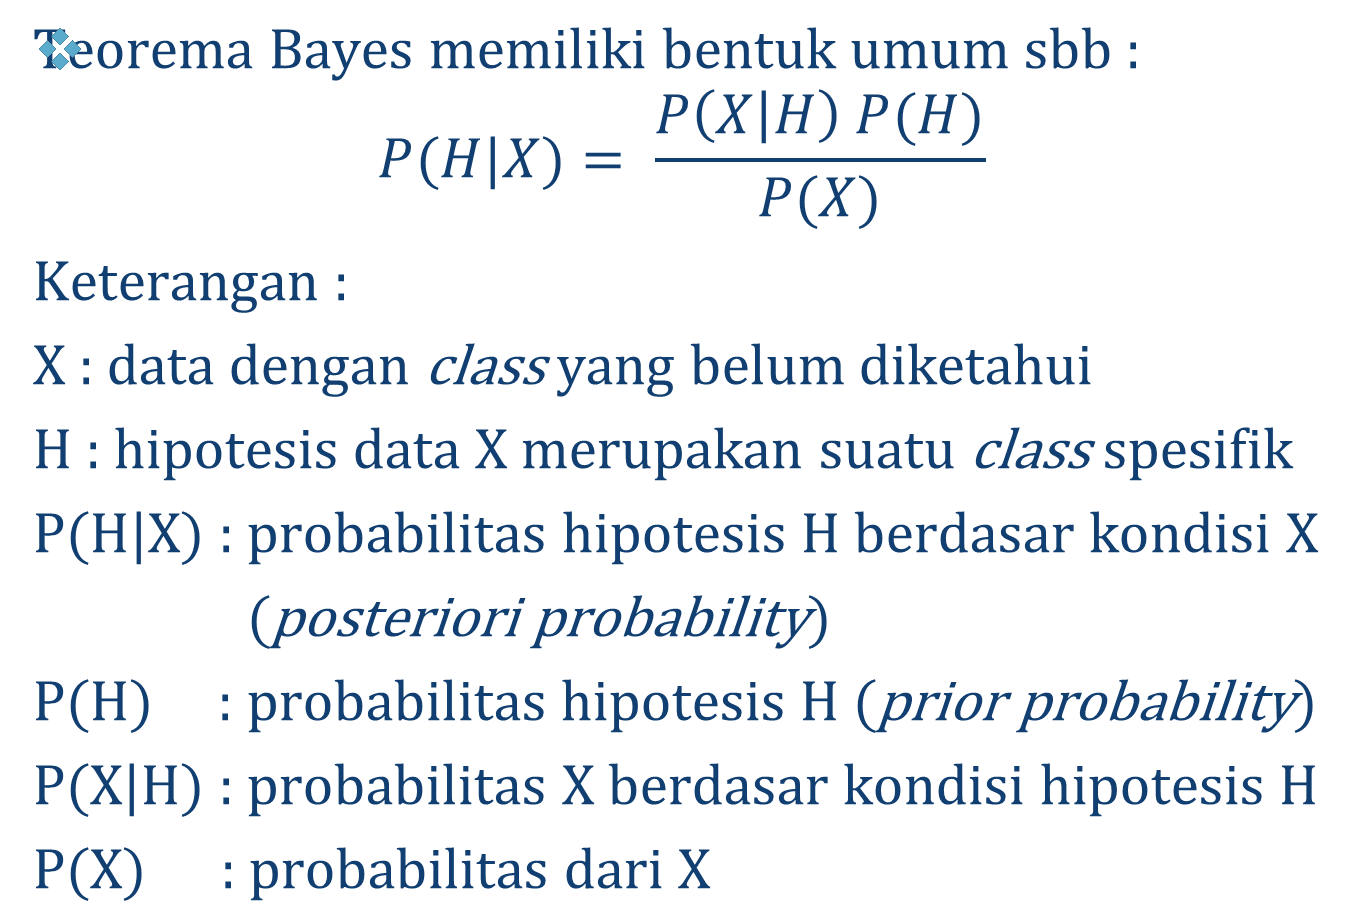

In [116]:
from PIL import Image
from IPython.display import display

# Open the image file
image = Image.open("naive bayes.png")  

# Display the image
display(image)

Contoh Data:

- Deposit: {(Campaign, Balance) = (3, 100), (4, 110), (5, 95), (6, 120)}
- Tidak Deposit: {(Campaign, Balance) = (4, 130), (5, 135), (6, 140), (7, 130)}


- Probabilitas Prior:
   -  P(Deposit) = Jumlah sampel Deposit / Jumlah total sampel = 4 / 8 = 0.5
   -  P(Tidak Deposit) = Jumlah sampel Tidak Deposit / Jumlah total sampel = 4 / 8 = 0.5


- Probabilitas Fitur:
    - P(Campaign = 5 | Deposit) = 0 (karena tidak ada sampel Deposit dengan campaign 5)
    - P(Diameter = 5 | Tidak Deposit) = 0 (karena tidak ada sampel tidak deposit dengan campaign 5)
    - P(Balance = 120 | deposit) = 0.25 (1 sampel deposit dengan balance 120 dari total 4 sampel deposit)
    - P(Balance = 120 | tidak deposit) = 0 (karena tidak ada sampel Jeruk dengan berat 120)

- Probabilitas Posterior:
    - P(Deposit | Campaign = 5, Balance = 120) ∝ P(Campaign = 5 | Deposit) * P(Balance = 120 | Deposit) * P(Deposit)
    = 0 * 0.25 * 0.5 = 0

    - P(Tidak Deposit | Campaign = 5, Balance = 120) ∝ P(Campaign = 5 | Tidak Deposit) * P(Balance = 120 | Tidak Deposit) * P(Tidak Deposit)
    = 0.25 * 0 * 0.5 = 0

Dalam kasus ini, hasilnya adalah nol untuk kedua probabilitas posterior

In [117]:
# Create an empty DataFrame to store the CV results
df_cv = pd.DataFrame()

# Append the lists to the DataFrame
df_cv['Scoring Method'] = list_scoring_method #list dari scoring method f1, f2 dan recall
df_cv['Algorithm Model'] = list_algo #list dari algoritma yang digunakan 
df_cv['CV Score'] = list_cv_score #hasil cross validation 
df_cv['CV Score Mean'] = list_cv_score_mean #rata-rata dari hasil cross validation
df_cv['CV Score Std'] = list_cv_score_std #menampilkan standar deviasi dari hasil cross validation

df_cv

,Scoring Method,Algorithm Model,CV Score,CV Score Mean,CV Score Std
0,"make_scorer(fbeta_score, beta=2)","LogisticRegression(class_weight='balanced', ra...","[68.0, 66.0, 64.0, 67.0, 66.0]",66.2,0.011638
1,"make_scorer(fbeta_score, beta=2)",KNeighborsClassifier(),"[63.0, 61.0, 61.0, 63.0, 59.0]",61.4,0.016153
2,"make_scorer(fbeta_score, beta=2)",DecisionTreeClassifier(class_weight='balanced'...,"[54.0, 59.0, 54.0, 67.0, 51.0]",57.0,0.057934
3,"make_scorer(fbeta_score, beta=2)",AdaBoostClassifier(random_state=0),"[66.0, 66.0, 63.0, 63.0, 66.0]",64.8,0.013177
4,"make_scorer(fbeta_score, beta=2)",GradientBoostingClassifier(random_state=0),"[64.0, 67.0, 64.0, 65.0, 65.0]",65.0,0.010153
5,"make_scorer(fbeta_score, beta=2)","XGBClassifier(base_score=None, booster=None, c...","[64.0, 66.0, 64.0, 65.0, 67.0]",65.2,0.013312
6,"make_scorer(fbeta_score, beta=2)",RandomForestClassifier(random_state=0),"[63.0, 67.0, 64.0, 63.0, 63.0]",64.0,0.015293
7,"make_scorer(fbeta_score, beta=2)",GaussianNB(),"[59.0, 58.0, 57.0, 59.0, 55.0]",57.6,0.013035


- Bedasarkan hasil cross validarion yang ditampilkan model Logistic Regression merupakan best model dengan skor error yang kecil dan Model yang underfitting adalah model DecisionTreeClassifier yang memiliki skor f2 yang rendah dan nilai error yang cukup tinggi(stabil performa keburukan modelnya).

Model terbaik adalah model Logistic Regression dengan skor f2 terbaik yaitu 66.2 dan error score 0.011174 dan model kedua terbaiknya adalah XGBoostClassifier dengan f2 skor 65.2 dengan error score 0.013035. Kedua model ini juga stabil dengan nilai error yang rendah. 

Saya ingin menjelaskan bagaimana logistic regression bekerja:
- Logistic regression memodelkan peluang suksesnya sebuah kejadian pada kasus ini adalah deposit dengan target 0 untuk tidak deposit dan 1 untuk deposit. 
- Logistic regression menggunakan fungsi sigmoid, Maka probability untuk data melakukan deposit/tidak deposit berada pada range 0 dan 1. Berbeda ketika kita menggunakan linear regression dimana probabilitynya bisa berada di luar range 0 dan 1. 
- Rumus untuk logistic Regression
    - log(p / (1 - p)) = β0 + β1x1 + β2x2 + ... + βnxn

    - di mana:

        - p adalah probabilitas variabel target biner
        - x1, x2, ..., xn adalah variabel prediktor
        - β0, β1, β2, ..., βn adalah koefisien model yang perlu diestimasi
- Secara matematis, fungsi sigmoid didefinisikan sebagai berikut:

    - sigmoid(x) = 1 / (1 + exp(-x))

    - di mana exp(x) adalah fungsi eksponensial dengan basis e (bilangan Euler), dan x adalah input yang ingin dipetakan ke dalam rentang [0, 1].

Fungsi sigmoid memiliki dua hal yang penting yaitu:

- Rentang Nilai: Fungsi sigmoid memastikan bahwa outputnya selalu berada dalam rentang [0, 1], yang dapat diinterpretasikan sebagai probabilitas atau skor keanggotaan dalam kelas positif.

- Model Logistic Regression dengan Odd Ratio (rasio odds) digunakan untuk memahami hubungan antara variabel independen (fitur) dan variabel dependen (target) dalam bentuk rasio odds. Odd ratio adalah rasio dari dua odds, yaitu odds sukses (probabilitas kejadian yang diinginkan dibagi dengan probabilitas kejadian yang tidak diinginkan) pada kelompok yang dibandingkan.


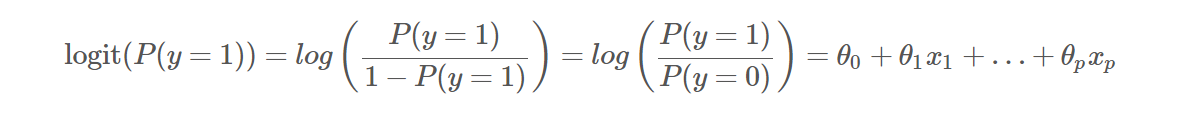

In [118]:
# Open the image file
image = Image.open("Screenshot 2023-06-10 001728.png") 

# Display the image
display(image)

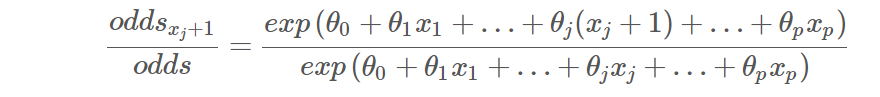

In [119]:
# Open the image file
image = Image.open("Screenshot 2023-06-10 001747.png") 

# Display the image
display(image)

**Penjelasan mengenai metode XGBOOST**<br>
- XGBoost (Extreme Gradient Boosting) adalah sebuah algoritma ensemble learning yang digunakan untuk pemodelan prediktif. XGBoost bekerja dengan membangun beberapa pohon keputusan secara sekuensial dan menggabungkan hasil prediksi dari setiap pohon tersebut.Pada setiap iterasi, XGBoost memperhitungkan residual (selisih antara nilai aktual dan nilai prediksi yang telah dibangun sebelumnya) untuk memperbaiki model yang ada. Hal ini dilakukan dengan mengoptimalkan fungsi objektif yang ditentukan, seperti mean squared error (MSE) untuk regresi atau log loss untuk klasifikasi.
- Fitur-fitur hyperparameter yang ada pada xgboost adalah:
    - Regularisasi: XGBoost menyediakan beberapa metode regularisasi untuk mengontrol kompleksitas model dan mencegah overfitting. Ini termasuk regularisasi L1 (lasso) dan L2 (ridge), yang mengendalikan kepentingan fitur dalam model.
    - XGBoost menggunakan algoritma yang dioptimalkan untuk membangun pohon keputusan dengan cara yang efisien dan optimal. Ini termasuk penggunaan penyeimbang bobot sampel untuk menghindari bias pada kelas minoritas dan pendekatan aproksimasi yang cerdas untuk menghitung impurity (ketidakmurnian) dalam pemisahan node.
    - selain itu kita juga dapat melakukan tuning jumlah pohon (n_estimators), kedalaman maksimum pohon (max_depth), kecepatan pembelajaran (learning_rate).

## **VIF(Variance Inflation Factor)**
Algoritma terbaik bedasarkan cross validation yang dilakukan adalah logistic regression maka saya perlu memeriksa apakah ada multicolinearity antar feature dengan VIF. 

In [120]:
#mengecek VIF untuk feature pada data 
# Assuming X is your feature matrix and y is your target variable
X_vif = pd.DataFrame(X_train_prep_df)  # Convert X to a pandas DataFrame
y_vif  = pd.Series(y_train)  # Convert y to a pandas Series

scaler = StandardScaler()
X_scaled_vif  = scaler.fit_transform(X_vif)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled_vif, i) for i in range(X_scaled_vif.shape[1])]
vif_data

,Feature,VIF
0,job_blue-collar,2.021155
1,job_entrepreneur,1.211147
2,job_housemaid,1.193836
3,job_management,2.240209
4,job_retired,1.955114
5,job_self-employed,1.241371
6,job_services,1.541070
7,job_student,1.322426
8,job_technician,1.938011
9,job_unemployed,1.232563


- Bedasarkan dataframe yang berisi nilai VIF untuk tiap feature tidak ada nilai VIF>3, Maka tidak ada multicolinearity untuk feature-feature pada data.

# 7. Hyperparameter Tuning

- Pertama-tama kita akan melakukan hyperparameter tuning untuk model XGboost

In [121]:
# Define the f2_score function for scoring
def f2_score(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2)

scorer = make_scorer(f2_score)
import numpy as np

hyperparam_xgb = {
    'model__n_estimators': range(50, 500, 50),
    'model__max_depth': range(2, 11, 2),
    'model__learning_rate': np.arange(0.1, 1.0, 0.1),
    'model__subsample': [0.2, 0.4, 0.6, 0.8, 1.0],
    'model__min_child_weight': range(2, 10, 4),
    'model__gamma': np.logspace(-2, 0, 3), 
    'model__colsample_bytree': [0.4, 0.6, 0.8, 1.0],
    'model__reg_alpha': np.logspace(-2, 0, 3),  
    'model__reg_lambda': np.logspace(-2, 0, 3), 
    'prep__robust': [RobustScaler(), StandardScaler(), MinMaxScaler()] #parameter untuk mengatur skala
    #robust scaler : mengubah median menjadi nol dan IQR menjadi 1
    #standard scaler :  mengubah Mean 0 dan standar deviasi 1
    #MinMaxScaler : mengubah Nilai min 0 dan nilai maks 1
}


# Create a pipeline with the necessary preprocessing steps
pipeline = Pipeline([
    ('prep', transformer),
    ('model', xgboost)
])



randomsearch = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=hyperparam_xgb,
    cv=5,
    scoring=scorer,
    n_jobs=-1,
    n_iter=2000
)

In [122]:
randomsearch.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['job',
                                                                                'contact',
                                                                                'loan',
                                                                                'housing']),
                                                                              ('ordinal',
                                                                               Pipeline(steps=[('ordinal_encoder',
                                                                                                OrdinalEncoder(mapping=[{'col': 'poutcome',
                                                                                                                         'data_type': dtype('O'),
                                                                                                                         'mapping': failure    1
success    2
other      0
unknown    0
dtype: int64...
                                        'model__learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'model__max_depth': range(2, 11, 2),
                                        'model__min_child_weight': range(2, 10, 4),
                                        'model__n_estimators': range(50, 500, 50),
                                        'model__reg_alpha': array([0.01, 0.1 , 1.  ]),
                                        'model__reg_lambda': array([0.01, 0.1 , 1.  ]),
                                        'model__subsample': [0.2, 0.4, 0.6, 0.8,
                                                             1.0],
                                        'prep__robust': [RobustScaler(),
                                                         StandardScaler(),
                                                         MinMaxScaler()]},
                   scoring=make_scorer(f2_score))

In [123]:
randomsearch.best_params_

{'prep__robust': MinMaxScaler(),
 'model__subsample': 0.6,
 'model__reg_lambda': 0.1,
 'model__reg_alpha': 0.1,
 'model__n_estimators': 250,
 'model__min_child_weight': 6,
 'model__max_depth': 6,
 'model__learning_rate': 0.1,
 'model__gamma': 0.01,
 'model__colsample_bytree': 0.6}

In [124]:
randomsearch.best_score_

0.6592282660400988

-  `model_n_estimators`: Parameter ini menentukan jumlah pohon yang akan dibangun dalam XGBoost. Nilai terbaik yang ditemukan adalah 250, yang berarti akan ada 250 pohon yang dibangun.

- `modeling__max_depth`: Parameter ini mengontrol kedalaman maksimum dari setiap pohon dalam XGBoost. Nilai terbaik yang ditemukan adalah 6, yang berarti setiap pohon akan memiliki kedalaman maksimum 6.

-  `model__learning_rate`: Parameter ini menentukan kecepatan model belajar atau memproses data training dengan learning rate terbaiknya adalah 0.1

- `model__subsample`: Parameter ini mengontrol persentase sampel yang akan digunakan untuk melatih setiap pohon dalam XGBoost. Nilai terbaik yang ditemukan adalah 0.6, yang berarti sekitar 60% dari total sampel akan digunakan dalam setiap pohon.


- `min_child_weight`: Hyperparameter min_child_weight memiliki nilai terbaik 6.min_child_weight adalah nilai minimum dari total bobot (weight) yang diperlukan untuk membagi ulang sebuah node dalam XGBoost. Node akan dibagi hanya jika jumlah bobot yang melewatinya melebihi min_child_weight. Parameter ini digunakan untuk mengontrol regularisasi dan mencegah overfitting.Jika min_child_weight terlalu rendah, model mungkin lebih cenderung overfitting (ini terkait dengan jumlah minimum sampel pada leaf node, untuk menghandle ketidakseimbangan pada kelas, bobot yang lebih tinggi diberikan pada kelas yang minoritas )

- `model__gamma`: hyperparameter gamma memiliki nilai terbaik 0.01.  Hyperparameter gamma adalah ambang batas yang mengontrol ketika sebuah node akan dibagi menjadi dua cabang selama proses pembentukan pohon dalam XGBoost. Nilai gamma mengontrol pruning atau pemangkasan pohon ketika sebuah node displitting . Nilai gamma yang lebih tinggi akan mengarah pada pemangkasan lebih lanjut dalam proses pembentukan pohon. Jika nilai gamma terlalu tinggi, pohon akan lebih simpel dan memiliki bias yang lebih tinggi. Jika nilai gamma terlalu rendah, pohon akan lebih kompleks dan mungkin mempengaruhi overfitting.


- `model__colsample_bytree`: Parameter ini menentukan persentase fitur yang akan digunakan dalam setiap pohon dalam XGBoost. Nilai terbaiknya adalah 0.6. Maka 60% feature digunakan dalam setiap pohon pada model XGBoost.

- `model__reg_alpha` : Parameter ini mengatur penalti pada model XGBoost. Alpha disini mengacu pada penalti lasso dengan nilai terbaik 0.1.

- `model__reg_lambda`: Parameter ini mengatur penalti pada model XGBoost. Lambda disini mengacu pada penalti lambda dengan nilai terbaik 0.1.

- `prep__robust`: Parameter ini berfungsi untuk menentukan scaler terbaik yang digunakan pada kolom numerikal. Dengan scaler terbaiknya MinMaxScaler. 


In [125]:


df_random_xgb = pd.DataFrame(randomsearch.cv_results_).sort_values('rank_test_score')
df_random_xgb.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_prep__robust,param_model__subsample,param_model__reg_lambda,param_model__reg_alpha,param_model__n_estimators,param_model__min_child_weight,...,param_model__colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1563,1.893255,0.049486,0.032610,0.001202,MinMaxScaler(),0.6,0.1,0.1,250,6,...,0.6,"{'prep__robust': MinMaxScaler(), 'model__subsa...",0.677530,0.669183,0.640717,0.641470,0.667241,0.659228,0.015207,1
933,2.379548,0.051393,0.036813,0.003922,StandardScaler(),0.4,0.01,0.1,350,2,...,0.8,"{'prep__robust': StandardScaler(), 'model__sub...",0.650673,0.684861,0.630817,0.653820,0.660475,0.656129,0.017437,2
1069,2.892694,0.077482,0.045046,0.003883,StandardScaler(),0.6,0.01,1.0,250,2,...,0.6,"{'prep__robust': StandardScaler(), 'model__sub...",0.655373,0.671923,0.651203,0.649485,0.651427,0.655882,0.008249,3
498,0.389608,0.012143,0.026406,0.003200,RobustScaler(),0.6,0.01,0.01,50,6,...,0.8,"{'prep__robust': RobustScaler(), 'model__subsa...",0.665752,0.682977,0.639876,0.638774,0.651651,0.655806,0.016723,4
1191,1.162378,0.055591,0.034115,0.003958,MinMaxScaler(),1.0,0.01,1.0,200,2,...,0.4,"{'prep__robust': MinMaxScaler(), 'model__subsa...",0.654414,0.659567,0.655907,0.648405,0.660345,0.655728,0.004276,5


In [126]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import make_scorer, fbeta_score
import numpy as np

# Create a pipeline with the scaler and the model
pipeline = Pipeline([
    ('prep', transformer),
    ('model', xgboost)
])

# Define the parameter grid with ranges
param_grid = {
    'prep__robust': [RobustScaler(), StandardScaler(), MinMaxScaler()],
    'model__subsample': np.arange(0.6, 1.0, 0.1),
    'model__reg_lambda': np.arange(0.1,1.1,0.3),
    'model__reg_alpha': np.arange(0.01,0.2,0.03),
    'model__n_estimators': range(100,300,50),
    'model__min_child_weight': range(4,10,2),
    'model__max_depth': range(6,12,2),
    'model__learning_rate': np.arange(0.1,1.1,0.3),
    'model__gamma': np.arange(0.1,1.1,0.3),
    'model__colsample_bytree': np.arange(0.6, 1.0, 0.1)
}

# Define the F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

# Perform grid search

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    cv=5,
    scoring=scorer,
    n_jobs=-1,
    n_iter=2000
)


In [127]:

random_search.fit(X_train, y_train)  


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['job',
                                                                                'contact',
                                                                                'loan',
                                                                                'housing']),
                                                                              ('ordinal',
                                                                               Pipeline(steps=[('ordinal_encoder',
                                                                                                OrdinalEncoder(mapping=[{'col': 'poutcome',
                                                                                                                         'data_type': dtype('O'),
                                                                                                                         'mapping': failure    1
success    2
other      0
unknown    0
dtype: int64...
                                        'model__max_depth': range(6, 12, 2),
                                        'model__min_child_weight': range(4, 10, 2),
                                        'model__n_estimators': range(100, 300, 50),
                                        'model__reg_alpha': array([0.01, 0.04, 0.07, 0.1 , 0.13, 0.16, 0.19]),
                                        'model__reg_lambda': array([0.1, 0.4, 0.7, 1. ]),
                                        'model__subsample': array([0.6, 0.7, 0.8, 0.9]),
                                        'prep__robust': [RobustScaler(),
                                                         StandardScaler(),
                                                         MinMaxScaler()]},
                   scoring=make_scorer(f2_score))

In [128]:
random_search.best_params_

{'prep__robust': RobustScaler(),
 'model__subsample': 0.7999999999999999,
 'model__reg_lambda': 0.4,
 'model__reg_alpha': 0.13,
 'model__n_estimators': 150,
 'model__min_child_weight': 4,
 'model__max_depth': 8,
 'model__learning_rate': 0.1,
 'model__gamma': 0.7000000000000001,
 'model__colsample_bytree': 0.7999999999999999}

In [129]:

random_search.best_score_

0.6581696154902901

-  `model_n_estimators`: Parameter ini menentukan jumlah pohon yang akan dibangun dalam XGBoost. Nilai terbaik yang ditemukan adalah 250, yang berarti akan ada 250 pohon yang dibangun.

- `modeling__max_depth`: Parameter ini mengontrol kedalaman maksimum dari setiap pohon dalam XGBoost. Nilai terbaik yang ditemukan adalah 10, yang berarti setiap pohon akan memiliki kedalaman maksimum 8.

-  `model__learning_rate`: Parameter ini menentukan kecepatan model belajar atau memproses data training dengan learning rate terbaiknya adalah 0.1

- `model__subsample`: Parameter ini mengontrol persentase sampel yang akan digunakan untuk melatih setiap pohon dalam XGBoost. Nilai terbaik yang ditemukan adalah 0.79999, yang berarti sekitar 79,99% dari total sampel akan digunakan dalam setiap pohon.


- `min_child_weight`: Hyperparameter min_child_weight memiliki nilai terbaik 4.min_child_weight adalah nilai minimum dari total bobot (weight) yang diperlukan untuk membagi ulang sebuah node dalam XGBoost. Node akan dibagi hanya jika jumlah bobot yang melewatinya melebihi min_child_weight. Parameter ini digunakan untuk mengontrol regularisasi dan mencegah overfitting.Jika min_child_weight terlalu rendah, model mungkin lebih cenderung overfitting (ini terkait dengan jumlah minimum sampel pada leaf node, untuk menghandle ketidakseimbangan pada kelas, bobot yang lebih tinggi diberikan pada kelas yang minoritas )

- `model__gamma`: hyperparameter gamma memiliki nilai terbaik 0.7000000000000001.  Hyperparameter gamma adalah ambang batas yang mengontrol ketika sebuah node akan dibagi menjadi dua cabang selama proses pembentukan pohon dalam XGBoost. Nilai gamma mengontrol pruning atau pemangkasan pohon ketika sebuah node displitting . Nilai gamma yang lebih tinggi akan mengarah pada pemangkasan lebih lanjut dalam proses pembentukan pohon. Jika nilai gamma terlalu tinggi, pohon akan lebih simpel dan memiliki bias yang lebih tinggi. Jika nilai gamma terlalu rendah, pohon akan lebih kompleks dan mungkin mempengaruhi overfitting.


- `model__colsample_bytree`: Parameter ini menentukan persentase fitur yang akan digunakan dalam setiap pohon dalam XGBoost. Nilai terbaiknya adalah 0.7999. Maka 79,9999% feature digunakan dalam setiap pohon pada model XGBoost.

- `model__reg_alpha` : Parameter ini mengatur penalti pada model XGBoost. Alpha disini mengacu pada penalti lasso dengan nilai terbaik 0.13.

- `model__reg_lambda`: Parameter ini mengatur penalti pada model XGBoost. Lambda disini mengacu pada penalti lambda dengan nilai terbaik 0.4.

- `prep__robust`: Parameter ini berfungsi untuk menentukan scaler terbaik yang digunakan pada kolom numerikal. Dengan scaler terbaiknya robust scaler. 

In [130]:


df_random_xgb = pd.DataFrame(random_search.cv_results_).sort_values('rank_test_score')
df_random_xgb.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_prep__robust,param_model__subsample,param_model__reg_lambda,param_model__reg_alpha,param_model__n_estimators,param_model__min_child_weight,...,param_model__colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
399,1.712229,0.055185,0.032569,0.000976,RobustScaler(),0.8,0.4,0.13,150,4,...,0.8,"{'prep__robust': RobustScaler(), 'model__subsa...",0.667814,0.666552,0.645718,0.644097,0.666667,0.658170,0.010849,1
1320,2.811613,0.179795,0.039845,0.000340,RobustScaler(),0.7,0.7,0.01,200,4,...,0.7,"{'prep__robust': RobustScaler(), 'model__subsa...",0.656047,0.666781,0.652697,0.648370,0.665295,0.657838,0.007139,2
759,3.425212,0.218221,0.042014,0.003583,MinMaxScaler(),0.7,1.0,0.1,250,6,...,0.7,"{'prep__robust': MinMaxScaler(), 'model__subsa...",0.656271,0.660281,0.656859,0.652473,0.660507,0.657278,0.002957,3
1459,1.786211,0.038681,0.032017,0.000012,RobustScaler(),0.7,0.4,0.07,200,4,...,0.6,"{'prep__robust': RobustScaler(), 'model__subsa...",0.659341,0.666552,0.643103,0.651421,0.664601,0.657004,0.008703,4
1545,3.523003,0.152728,0.044937,0.003775,MinMaxScaler(),0.8,1.0,0.01,250,4,...,0.9,"{'prep__robust': MinMaxScaler(), 'model__subsa...",0.649417,0.678426,0.647199,0.646817,0.661866,0.656745,0.012163,5


**Tuning untuk model logistic regression**

In [131]:

def f2_score(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2)

scorer = make_scorer(f2_score)

hyperparam_lr = {
    'model__C': list(np.logspace(-2, 2, num=10)), #parameter untuk regularion strengh(penalti)
    #list berisi angka [0.01, 0.021544346900318846, 0.046415888336127774, 0.1, 0.21544346900318834, 0.46415888336127775, 1.0, 2.1544346900318843, 4.6415888336127775, 10.0]
    'model__penalty': ['l1', 'l2'], #regularization yang digunakan adalah lasso dan ridge(jenis penalti)
    'model__class_weight': [None, {0: 1, 1: 2}],  # memberikan weight 1 untuk kelas 0(tidak deposit) dan 2 untuk kelas 1(deposit)
    'prep__robust': [RobustScaler(), StandardScaler(), MinMaxScaler()] #parameter untuk mengatur skala 
    #scaler yang saya gunakan disini adalah robust:
    #median menjadi nol dan IQR menjadi 1
    #standard scaler : Mean 0 dan standar deviasi 1
    #MinMaxScaler : Nilai min 0 dan nilai maks 1
}

model_pipe_lr = Pipeline([
    ('prep', transformer),  #Menggunakan kolumn transformer yang berisi encoding dan scailing (tahap preprocessing)
    ('model', logreg)  #Mendefinisikan model logistic regression 
])

gridsearch_lr = GridSearchCV(
    estimator=model_pipe_lr,
    param_grid=hyperparam_lr,
    cv=5,
    scoring=scorer,
    n_jobs=-1
)



In [132]:
#melakukan fitting pada X dan y dengan model logistic regression 
gridsearch_lr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['job',
                                                                          'contact',
                                                                          'loan',
                                                                          'housing']),
                                                                        ('ordinal',
                                                                         Pipeline(steps=[('ordinal_encoder',
                                                                                          OrdinalEncoder(mapping=[{'col': 'poutcome',
                                                                                                                   'data_type': dtype('O'),
                                                                                                                   'mapping': failure    1
success    2
other      0
unknown    0
dtype: int64},
                                                                                                                  {'co...
             param_grid={'model__C': [0.01, 0.027825594022071243,
                                      0.0774263682681127, 0.21544346900318834,
                                      0.5994842503189409, 1.6681005372000592,
                                      4.6415888336127775, 12.915496650148826,
                                      35.93813663804626, 100.0],
                         'model__class_weight': [None, {0: 1, 1: 2}],
                         'model__penalty': ['l1', 'l2'],
                         'prep__robust': [RobustScaler(), StandardScaler(),
                                          MinMaxScaler()]},
             scoring=make_scorer(f2_score))

In [133]:
gridsearch_lr.best_params_ #mendapatkan hyperparameter terbaik dari model logistic regression

{'model__C': 0.01,
 'model__class_weight': {0: 1, 1: 2},
 'model__penalty': 'l1',
 'prep__robust': MinMaxScaler()}

- `model__C` : merupakan parameter untuk regularization strength atau penalti pada model logistic regression. Disini regularization strenghnya terbaiknya adalah 0.01. Semakin kecil nilai C maka penalti yang diberikan semakin berat pada model. 

- `model__class_weight` : Parameter ini berfungsi untuk mengatur bobot pada kelas target. Dengan salah satu alternatifnya memberi bobot 1 pada kelas 0 yaitu tidak deposit dan 2 pada kelas deposit. Class weight yang terbaik pada model ini adalah  {0: 1, 1: 2}

- `model__penalty` : Parameter ini berfungsi untuk mengatur penalti lasso(l1) dan ridge(l2) pada model logistic regression. Dengan penalty terbaiknya adalah lasso (ini berfungsi untuk menghandle overfitting)

    - Dalam lasso regression, regularisasi L1 mengakibatkan beberapa koefisien menjadi nol. Dengan kata lain, lasso dapat melakukan seleksi fitur, menghilangkan beberapa fitur yang tidak relevan dari model. Ini memungkinkan penggunaan variabel yang lebih sedikit, yang dapat meningkatkan interpretabilitas model dan mengurangi kompleksitasnya. 
    -  Dalam ridge regression, koefisien regresi tidak menjadi nol. Ridge regression memungkinkan penggunaan semua variabel dalam model tanpa menghilangkan yang mana pun. Ridge regression berguna ketika semua variabel dianggap penting dan tidak ingin mengeluarkan variabel dari model

- `prep__robust` : Parameter ini berfungsi untuk mengatur scaler pada model logistic regression. Dengan scaler terbaiknya adalah MinMaxScaler. 

In [134]:
gridsearch_lr.best_score_ #mendapatkan skor terbaik dengan metric f2 untuk logistic regression

0.8040207356798131

In [135]:
# hasil gridsearch untuk model logistic regression dalam dataframe yang dirutkan bedasarkan rank test score

df_grid = pd.DataFrame(gridsearch_lr.cv_results_).sort_values('rank_test_score')
df_grid.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__class_weight,param_model__penalty,param_prep__robust,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,0.095477,0.028125,0.028789,0.012030,0.01,"{0: 1, 1: 2}",l1,MinMaxScaler(),"{'model__C': 0.01, 'model__class_weight': {0: ...",0.809189,0.789866,0.796085,0.820198,0.804765,0.804021,0.010510,1
7,0.074241,0.004190,0.023234,0.002907,0.01,"{0: 1, 1: 2}",l1,StandardScaler(),"{'model__C': 0.01, 'model__class_weight': {0: ...",0.800357,0.806213,0.787120,0.821050,0.802233,0.803395,0.010909,2
6,0.082356,0.010743,0.024576,0.003905,0.01,"{0: 1, 1: 2}",l1,RobustScaler(),"{'model__C': 0.01, 'model__class_weight': {0: ...",0.799406,0.804444,0.786013,0.821292,0.794751,0.801181,0.011744,3
18,0.082493,0.009772,0.021382,0.001219,0.027826,"{0: 1, 1: 2}",l1,RobustScaler(),"{'model__C': 0.027825594022071243, 'model__cla...",0.793197,0.804958,0.778046,0.813190,0.789709,0.795820,0.012210,4
19,0.085241,0.037799,0.021196,0.001009,0.027826,"{0: 1, 1: 2}",l1,StandardScaler(),"{'model__C': 0.027825594022071243, 'model__cla...",0.795489,0.803705,0.777811,0.811940,0.789474,0.795684,0.011719,5


- Model dengan kriteria sebagai berikut:
    - {'model__C': 0.01,
    - 'model__class_weight': {0: 1, 1: 2},
    - 'model__penalty': 'l1',
    - 'prep__robust': MinMaxScaler()}
- Merupakan model logistic regression terbaik yang memiliki skor f2 0.8040207356798131

In [136]:
gridsearch_lr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['job',
                                                                          'contact',
                                                                          'loan',
                                                                          'housing']),
                                                                        ('ordinal',
                                                                         Pipeline(steps=[('ordinal_encoder',
                                                                                          OrdinalEncoder(mapping=[{'col': 'poutcome',
                                                                                                                   'data_type': dtype('O'),
                                                                                                                   'mapping': failure    1
success    2
other      0
unknown    0
dtype: int64},
                                                                                                                  {'co...
             param_grid={'model__C': [0.01, 0.027825594022071243,
                                      0.0774263682681127, 0.21544346900318834,
                                      0.5994842503189409, 1.6681005372000592,
                                      4.6415888336127775, 12.915496650148826,
                                      35.93813663804626, 100.0],
                         'model__class_weight': [None, {0: 1, 1: 2}],
                         'model__penalty': ['l1', 'l2'],
                         'prep__robust': [RobustScaler(), StandardScaler(),
                                          MinMaxScaler()]},
             scoring=make_scorer(f2_score))

In [137]:
print('f2 score model logistic regression sebelum tuning : 66.2')
print(f'f2 score model logistic regression sesudah tuning',gridsearch_lr.best_score_ )
print('f2 score model xgboost sebelum tuning : 65.2')
print(f'f2 score model xgboost sesudah tuning',random_search.best_score_ )

f2 score model logistic regression sebelum tuning : 66.2
f2 score model logistic regression sesudah tuning 0.8040207356798131
f2 score model xgboost sebelum tuning : 65.2
f2 score model xgboost sesudah tuning 0.6581696154902901


Maka karena f2 score dari model logistic regression setelah tuning lebih tinggi dibandingkan dengan f2 score model xgboost setelah tuning kita akan melakukan prediksi ke test set dengan metode logistic regression setelah tuning 

# 8. Predict ke Test Set

**before tuning untuk logistic regression**

In [138]:
logreg

LogisticRegression(class_weight='balanced', random_state=0, solver='liblinear')

In [139]:
# benchmark model logreg
model_pipe_benchmark_logreg = Pipeline([
    ('prep', transformer), 
    ('model', logreg)])

#melakukan fitting pada X train dan y train dengan model logreg
model_pipe_benchmark_logreg.fit(X_train, y_train)

#melakukan predict pada X test
y_pred_benchmark_logreg = model_pipe_benchmark_logreg.predict(X_test)

#menggunakan f2 score
f2_score = fbeta_score(y_test, y_pred_benchmark_logreg, beta=2)
print("F2 Score:", f2_score)

F2 Score: 0.6554959785522788


**after tuning untuk logistic regression**

In [140]:
# best model
model_pipe_best_logreg = gridsearch_lr.best_estimator_

model_pipe_best_logreg.fit(X_train, y_train)

y_pred_best_logreg = model_pipe_best_logreg.predict(X_test)

f2_score = fbeta_score(y_test, y_pred_best_logreg, beta=2)
print("F2 Score:", f2_score)

F2 Score: 0.8176100628930817


f2 score sebelum tuning dan setelah tuning mengalami peningkatan yang signifikan
     - f2 sebelum tuning : 0.6554
     - f2 setelah tuning : 0.8176

In [141]:
# Mendapatkan koefisien
coefficients = model_pipe_best_logreg.named_steps['model'].coef_

# Mendapatkan nama kolom dari X_train_prep_df
column_names = X_train_prep_df.columns

# Membuat dataframe untuk menyimpan koefisien dan nama kolom
coefficients_df = pd.DataFrame(coefficients, columns=column_names)

# Sort coefficient dari yang paling tinggi nilainya
sorted_coefficients_df = coefficients_df.abs().iloc[0].sort_values(ascending=False)
sorted_coefficients_df


contact_unknown      0.687050
poutcome             0.681170
housing_yes          0.417108
loan_yes             0.082103
job_blue-collar      0.000000
contact_telephone    0.000000
campaign             0.000000
balance              0.000000
age                  0.000000
month                0.000000
job_unknown          0.000000
job_entrepreneur     0.000000
job_unemployed       0.000000
job_technician       0.000000
job_student          0.000000
job_services         0.000000
job_self-employed    0.000000
job_retired          0.000000
job_management       0.000000
job_housemaid        0.000000
pdays                0.000000
Name: 0, dtype: float64

- Bedasarkan dataframe diatas maka feature paling penting pada model logistic regression adalah poutcome, contact_unkown, housing_yes
- Poutcome memiliki koefisien paling tinggi yaitu 0.687050 dan contact unkown memiliki koefisien 0.681170 , dan housing_yes memiliki koefisien 0.417108. Ketiga feature ini memiliki pengaruh yang signifikan dalam prediksi. 
- Loan_yes juga memiliki koefisien yang cukup tinggi yaitu 0.082103 feature ini juga mempengaruhi hasil prediksi model. 
- Hal ini sesuai dengan eksplorasi data pada EDA bahwa customer dengan poutcome success cenderung untuk deposit.  contact unknown cenderung untuk tidak deposit, customer dengan housing yes cenderung untuk tidak deposit,.
 

In [142]:


# Menuliskan nama kolom
column_names = ['poutcome', 'month', 'job_blue-collar', 'job_unemployed', 'campaign', 'balance', 'age', 'contact_telephone',
                'job_entrepreneur', 'job_unknown', 'job_technician', 'job_student', 'job_services', 'job_self-employed',
                'job_retired', 'job_management', 'job_housemaid', 'pdays', 'loan_yes', 'housing_yes', 'contact_unknown']

# Mendapatkan koefisien
coefficients = model_pipe_best_logreg.named_steps['model'].coef_

# Set the range values
c = 1
d = 0

# Kalkulasi odd ratio
odd_ratios = np.exp(coefficients) * (c - d)

# Membuat dataframe untuk menyimpan odd ratio dan nama kolom
odd_ratios_df = pd.DataFrame(odd_ratios, columns=column_names)

# Sort odd ratio dari yang paling tinggi
sorted_odd_ratios_df = odd_ratios_df.abs().iloc[0].sort_values(ascending=False)

# Print odd ratio
print("Odd Ratios:")
for feature, odd_ratio in sorted_odd_ratios_df.items():
    print(f"Feature: {feature}, Odd Ratio: {odd_ratio}")



Odd Ratios:
Feature: job_management, Odd Ratio: 1.9761884519351258
Feature: poutcome, Odd Ratio: 1.0
Feature: job_unknown, Odd Ratio: 1.0
Feature: housing_yes, Odd Ratio: 1.0
Feature: loan_yes, Odd Ratio: 1.0
Feature: pdays, Odd Ratio: 1.0
Feature: job_housemaid, Odd Ratio: 1.0
Feature: job_student, Odd Ratio: 1.0
Feature: month, Odd Ratio: 1.0
Feature: job_technician, Odd Ratio: 1.0
Feature: job_entrepreneur, Odd Ratio: 1.0
Feature: contact_telephone, Odd Ratio: 1.0
Feature: age, Odd Ratio: 1.0
Feature: balance, Odd Ratio: 1.0
Feature: campaign, Odd Ratio: 1.0
Feature: job_unemployed, Odd Ratio: 1.0
Feature: job_blue-collar, Odd Ratio: 1.0
Feature: contact_unknown, Odd Ratio: 1.0
Feature: job_self-employed, Odd Ratio: 0.9211772202841247
Feature: job_retired, Odd Ratio: 0.658950078392937
Feature: job_services, Odd Ratio: 0.5030577413105739


- ketika odd ratio > 1 dan odd ratio < 1. Maka dapat disimpulkan bahwa feature-feature pada model memiliki asosiasi dengan target.
- Maka bedasarkan hasil yang ditampilkan feature job management dan housemaid memiliki nilai odd ratio paling tinggi. dan job_self employed, job_retired dan job_services memiliki nilai odd ratio paling rendah 
- Ketika job_management = 1 (job customer adalah management)  probability untuk deposit sebesar 1,9761884x dibandingkan job_mangement=0 (customer dengan job yang bukan management)
- Ketika job_self-employed = 1 (job customer adalah self employed) probability untuk deposit sebesar 0.92117722x dibandingkan dengan job_self-employed = 0 
- Ketika job_retired = 1 (job customer adalah retired) probability untuk deposit sebesar 0.6589500x dibandingkan dengan job_retired = 0 
- Ketika job_services = 1 (job customer adalah services) probability untuk deposir sebesar 0.5030577x dibandingkan dengan job_services = 0

# 9. Confusion Matrix

In [144]:
#y test merupakan jumlah masing-masing deposit(0 dan 1) sebelum dilakukan prediksi 
y_test_series = pd.Series(y_test)
value_counts = y_test_series.value_counts()

print(value_counts)

0    805
1    743
dtype: int64


**Confusion Matrix untuk model logistic regression**

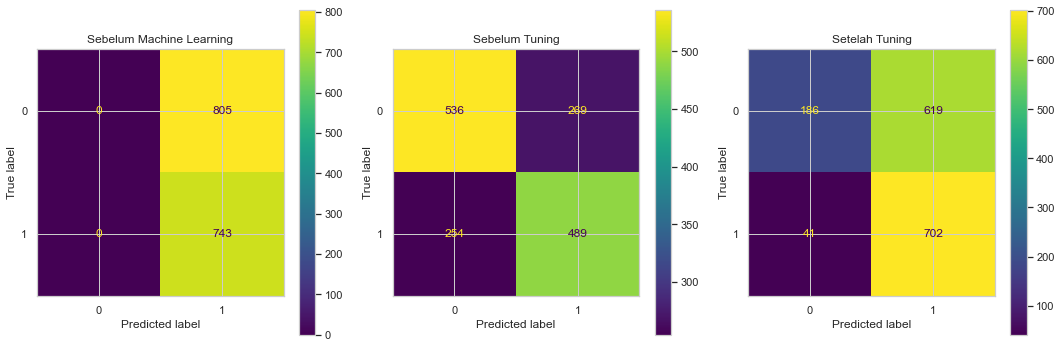

In [145]:
y_test = np.array(y_test)
array = np.array([1] * 1548)
y_before_ml = array

# Menghitung confusion matrices
cm_before_ml = confusion_matrix(y_test, y_before_ml)
cm_benchmark_lr = confusion_matrix(y_test, y_pred_benchmark_logreg)
cm_best_lr = confusion_matrix(y_test, y_pred_best_logreg)

# Membuat subplot dengan 1 baris dan 3 kolom
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Membuat plot untuk confusion matrix pertama 
axs[0].set_title('Sebelum Machine Learning')
disp_before_ml = ConfusionMatrixDisplay(confusion_matrix=cm_before_ml)
disp_before_ml.plot(ax=axs[0])

# Plot second confusion matrix
axs[1].set_title('Sebelum Tuning')
disp_benchmark = ConfusionMatrixDisplay(confusion_matrix=cm_benchmark_lr)
disp_benchmark.plot(ax=axs[1])

# Plot third confusion matrix
axs[2].set_title('Setelah Tuning')
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best_lr)
disp_best.plot(ax=axs[2])

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()

- Sebelum Machine Learning, seluruh customer akan diberikan marketing maka terdapat 743 customer yang melakukan deposit(True Positive) dan 805 customer yang tidak melakukan deposit(False Positive).
- Namun pada model logistic regression(sebelum tuning), Data berubah menjadi:
    - Customer yang tidak melakukan deposit dan tidak diberi marketing campaign(True Negative):536 customer
    - Customer yang tidak melakukan deposit namun diberi marketing campaign(False Positive):269 customer
    - Customer yang tidak diprediksi melakukan deposit dan tidak diberikan marketing campaign padahal memiliki potensi untuk melakukan deposit(False Negative): 254 customer. 
    - Customer yang diprediksi melakukan deposit dan diberi marketing campaign(True Positive):489 customer

- Karena kita berfokus untuk meminimalkan nilai True Negative karena kita tidak ingin kehilangan customer potensial yang akan melakukan deposit. Maka hasil setelah tuning sebagai berikut:
    - Customer yang tidak melakukan deposit dan tidak diberi marketing campaign(True Negative):186 customer
    - Customer yang tidak melakukan deposit namun diberi marketing campaign(False Positive):619 customer
    - Customer yang tidak diprediksi melakukan deposit dan tidak diberikan marketing campaign padahal memiliki potensi untuk melakukan deposit(False Negative): 41 customer. 
    - Customer yang diprediksi melakukan deposit dan diberi marketing campaign(True Positive):702 customer


- Keuntungan awal sebelum melakukan machine learning adalah : 
    - Maka cost awalnya adalah:
        - $25 x 1548 = $38.700
    - Keuntungan yang didapat dari deposito :
        - $125 x 743 = $92.785

Maka keuntungan yang didapat dari deposito customer dikurang dengan cost marketing: $54.085
- Keuntungan yang didapat sebelum tuning:
    - cost untuk marketing:
        - $25 x (269+489) = $18950
    - Keuntungan yang didapat dari deposito:
        - $125 x 489 = $61125 <br>
Maka keuntungan yang didapat dari deposito customer dikurang cost marketing: $42.175
- Keuntungan yang didapat setelah tuning:
    - cost untuk marketing:
        - $25x(619+702) = $33025
    - Keuntungan yang didapat dari deposito:
        - $125x702 = $87750
Maka keuntungan yang didapat dari deposito customer dikurang cost marketing: $54725


**Precision dan recall untuk logistic regression dengan threshold=0.5**

In [146]:


y_pred_proba = model_pipe_best_logreg.predict_proba(X_test)[:, 1]  # Predicted probabilities of the positive class

# Set threshold = 0.5
threshold = 0.5
y_pred = (y_pred_proba >= threshold).astype(int)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.5314155942467828
Recall: 0.9448183041722745


# Finding best threshold

- Hal Ini dilakukan agar kita dapat melihat manakah threshold terbaik yang dapat memaksimalkan nilai f2. 

In [147]:
list_recall_score = [] #membuat list kosong untuk menampung nilai recall
list_precision_score = []  #membuat list untuk menampung nilai precision
list_f2_score = [] #membuat list kosong untuk menampung nilai f2 score
list_i = []  #list kosong untuk threshold

i = 0.01 #threshold awal adalah 0.01 
while i <= 1.01:
    y_pred_class_dummy = np.where(y_pred_proba > i, 1, 0)
    list_f2_score.append(fbeta_score(y_test, y_pred_class_dummy, beta=2))

    list_recall_score.append(recall_score(y_test, y_pred_class_dummy))
    list_precision_score.append(precision_score(y_test, y_pred_class_dummy))
    list_i.append(i)
    i += 0.01

In [148]:
from sklearn.metrics import confusion_matrix

list_recall_score = []  # membuat list kosong untuk menampung nilai recall
list_precision_score = []  # membuat list untuk menampung nilai precision
list_f2_score = []  # membuat list kosong untuk menampung nilai f2 score
list_i = []  # list kosong untuk threshold
list_tp = []  # list kosong untuk true positives
list_tn = []  # list kosong untuk true negatives
list_fp = []  # list kosong untuk false positives
list_fn = []  # list kosong untuk false negatives

i = 0.01  # threshold awal adalah 0.01
while i <= 1.01:
    y_pred_class_dummy = np.where(y_pred_proba > i, 1, 0)
    list_f2_score.append(fbeta_score(y_test, y_pred_class_dummy, beta=2))

    recall = recall_score(y_test, y_pred_class_dummy)
    list_recall_score.append(recall)

    precision = precision_score(y_test, y_pred_class_dummy)
    list_precision_score.append(precision)

    list_i.append(i)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred_class_dummy)
    tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1, 0]
    list_tp.append(tp)
    list_tn.append(tn)
    list_fp.append(fp)
    list_fn.append(fn)

    i += 0.01



In [182]:
# Memasukkan nilai f2, threshold, recall, precision, true positives, true negatives,
# false positives, dan false negatives ke dalam DataFrame
df_f2 = pd.DataFrame()
df_f2['threshold'] = list_i
df_f2['f2'] = list_f2_score
df_f2['recall'] = list_recall_score
df_f2['precision'] = list_precision_score
df_f2['True Positive'] = list_tp
df_f2['True Negative'] = list_tn
df_f2['False Positive'] = list_fp
df_f2['False Negative'] = list_fn

# kalkulasi perhitungan
df_f2['Profit'] = (df_f2['True Positive'] * 100) - (df_f2['False Positive'] * 25) 

# Mengurutkan dari threshold yang terbaik
df_f2_sorted = df_f2.sort_values('Profit', ascending=False)
df_f2_sorted


,threshold,f2,recall,precision,True Positive,True Negative,False Positive,False Negative,Profit
49,0.50,0.817610,0.944818,0.531416,702,186,619,41,54725
48,0.49,0.817610,0.944818,0.531416,702,186,619,41,54725
42,0.43,0.816872,0.946164,0.528174,703,177,628,40,54600
44,0.45,0.816872,0.946164,0.528174,703,177,628,40,54600
39,0.40,0.816872,0.946164,0.528174,703,177,628,40,54600
...,...,...,...,...,...,...,...,...,...
92,0.93,0.000000,0.000000,0.000000,0,805,0,743,0
91,0.92,0.000000,0.000000,0.000000,0,805,0,743,0
89,0.90,0.000000,0.000000,0.000000,0,805,0,743,0
88,0.89,0.000000,0.000000,0.000000,0,805,0,743,0


- Nilai threshold terbaik adalah 0.50 dengan nilai f2 score 0.81761 yang memiliki nilai recall sebesar 0.944818 dan precision 0.531416, maka jika probability data untuk melakukan deposit > 0.5, data akan dianggap melakukan deposit. Profit yang didapatkan adalah $54725. 

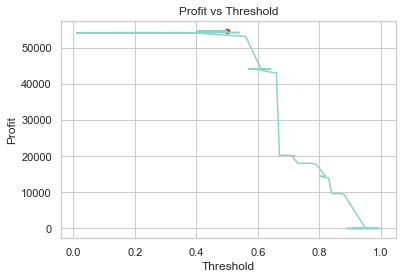

In [183]:
plt.plot(df_f2_sorted['threshold'], df_f2_sorted['Profit'])
sns.scatterplot(x=[0.5], y=[54725], color='r')
plt.xlabel('Threshold')
plt.ylabel('Profit')
plt.title('Profit vs Threshold')


plt.show()

- Sumbu x pada grafik diatas merupakan nilai threshold dari 0 hingga 1 dan profit pada masing-masing threshold. Profit mengalami penurunan yang signifikan ketika nilai threshold > 0.6.

In [210]:
# membuat variabel y_pred_class_logreg dengan nilai threshold baru yaitu 0.4. Maka data dengan probabiloty untuk deposit diatas 0.4 akan masuk ke kelas 1 

y_pred_class_logreg = np.where(y_pred_proba > 0.50, 1, 0) #kita membuat variabel y_Pred class dengan nilai threshold baru


confusion_matrix(y_test,y_pred_class_logreg)

array([[186, 619],
       [ 41, 702]], dtype=int64)

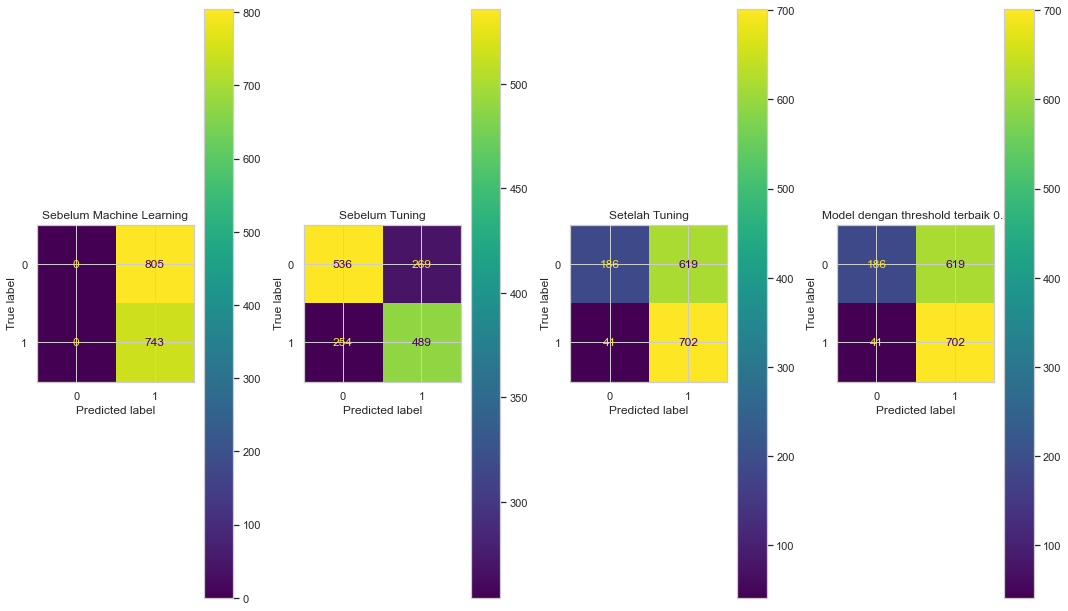

In [211]:
#menampilkan kondisi awal sebelum menggunakan machine learning
y_test = np.array(y_test)
array = np.array([1] * 1548)
y_before_ml = array

# Menghitung confusion matrix
cm_before_ml = confusion_matrix(y_test, y_before_ml)
cm_benchmark = confusion_matrix(y_test, y_pred_benchmark_logreg)
cm_best = confusion_matrix(y_test, y_pred_best_logreg)
cm_best_threshold = confusion_matrix(y_test, y_pred_class_logreg)

# Membuat subplot dengan 1 baris dan 4 kolom
fig, axs = plt.subplots(1, 4, figsize=(15, 10))

# Plot confusion matrix pertama
axs[0].set_title('Sebelum Machine Learning')
disp_before_ml = ConfusionMatrixDisplay(confusion_matrix=cm_before_ml)
disp_before_ml.plot(ax=axs[0])

# Plot confusion matrix kedua
axs[1].set_title('Sebelum Tuning')
disp_benchmark = ConfusionMatrixDisplay(confusion_matrix=cm_benchmark)
disp_benchmark.plot(ax=axs[1])

# Plot confusion matrix ketiga
axs[2].set_title('Setelah Tuning')
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best)
disp_best.plot(ax=axs[2])

# Plot confusion matrix keempat
axs[3].set_title('Model dengan threshold terbaik 0.5')
disp_best_threshold = ConfusionMatrixDisplay(confusion_matrix=cm_best_threshold)
disp_best_threshold.plot(ax=axs[3])


plt.tight_layout()

# Menampilkan plot yang digabungkan
plt.show()


- Keuntungan awal sebelum melakukan machine learning adalah : 
    - Maka cost awalnya adalah:
        - $25 x 1548 = $38.700
    - Keuntungan yang didapat dari deposito :
        - $125 x 743 = $92.785

Maka keuntungan yang didapat dari deposito customer dikurang dengan cost marketing: $54.085
- Keuntungan yang didapat sebelum tuning:
    - cost untuk marketing:
        - $25 x (269+489) = $18.975
    - Keuntungan yang didapat dari deposito:
        - $125 x 489 = $61.250
Maka keuntungan yang didapat dari deposito customer dikurang cost marketing: $42.275
- Keuntungan yang didapat setelah tuning:
    - cost untuk marketing:
        - $25x(619+702) = $33025
    - Keuntungan yang didapat dari deposito:
        - $125x702 = $87750
Maka keuntungan yang didapat dari deposito customer dikurang cost marketing: $54.725

Machine learning dengan optimized threshold memiliki confusion matriks sebagai berikut:
 - Customer yang tidak melakukan deposit dan tidak diberi marketing campaign(True Negative):151 customer
- Customer yang tidak melakukan deposit namun diberi marketing campaign(False Positive):654 customer
- Customer yang tidak diprediksi melakukan deposit dan tidak diberikan marketing campaign padahal memiliki potensi untuk melakukan deposit(False Negative): 26 customer. 
- Customer yang diprediksi melakukan deposit dan diberi marketing campaign(True Positive):717 customer

- keuntungan setelah menggunakan model ML dengan threshold terbaik yaitu 0.50: 
    - cost untuk marketing:
        - $25x(619+702) = $33025
    - Keuntungan yang didapat dari deposito:
        - $125x702 = $87750
    
Maka keuntungan yang didapat dari deposito customer dikurang dengan cost marketing untuk optimized threshold 0.5: $54725


Terjadi peningkatan profit sebesar $640 setelah menggunakan machine learning 



**save model terbaik untuk logitic regression dengan pickle**

In [212]:
import pickle

In [213]:
# best model
logreg_tuning = gridsearch_lr.best_estimator_
logreg_tuning

# fit
logreg_tuning.fit(X, y)

# save dengan pickle
pickle.dump(logreg_tuning, open('model_logreg.sav', 'wb'))

In [214]:
# load model

model_loaded = pickle.load(open('model_logreg.sav', 'rb'))
model_loaded 

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['job', 'contact', 'loan',
                                                   'housing']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinal_encoder',
                                                                   OrdinalEncoder(mapping=[{'col': 'poutcome',
                                                                                            'data_type': dtype('O'),
                                                                                            'mapping': failure    1
success    2
other      0
unknown    0
dtype: int64},
                                                                                           {'col': 'month',
                                                                                            'data_type': dtype('O'),
                                                                                            'mapping': jan     1
feb     2
mar     3
apr     4
may     5
jun     6
jul     7
aug     8
sep     9
oct    10
nov    11
dec    12
dtype: int64}])),
                                                                  ('robust',
                                                                   RobustScaler())]),
                                                  ['poutcome', 'month']),
                                                 ('robust', MinMaxScaler(),
                                                  ['age', 'balance', 'campaign',
                                                   'pdays'])])),
                ('model',
                 LogisticRegression(C=0.01, class_weight={0: 1, 1: 2},
                                    penalty='l1', random_state=0,
                                    solver='liblinear'))])

In [215]:
# y actual = 1 --> deposit
y[0]

1

In [216]:
# customer index 0 akan diprediksi
X.iloc[[0], :]

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome
0,55,admin.,1662,no,no,cellular,jun,2,0,unknown


In [217]:
# coba predict pada seorang customer

model_loaded.predict(X.iloc[[0], :])

# customer index 0 diprediksi akan deposit
# prediksinya betul (TP)

array([1])

**SHAP VALUES**

SHAP (SHapley Additive exPlanations) adalah sebuah metode yang digunakan dalam interpretasi model pembelajaran mesin. SHAP values menyediakan cara untuk mengukur kontribusi relatif setiap fitur terhadap prediksi model.

SHAP values memberikan cara sistematis untuk menghitung kontribusi relatif setiap fitur terhadap prediksi model dengan mempertimbangkan setiap kombinasi kemungkinan fitur lainnya. Dalam hal ini, SHAP values menggambarkan bagaimana nilai prediksi model akan berubah ketika fitur-fitur tertentu dimasukkan atau dihilangkan.

In [218]:
# kita panggil best model yaitu logreg setelah tuning
logreg_tuning

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['job', 'contact', 'loan',
                                                   'housing']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinal_encoder',
                                                                   OrdinalEncoder(mapping=[{'col': 'poutcome',
                                                                                            'data_type': dtype('O'),
                                                                                            'mapping': failure    1
success    2
other      0
unknown    0
dtype: int64},
                                                                                           {'col': 'month',
                                                                                            'data_type': dtype('O'),
                                                                                            'mapping': jan     1
feb     2
mar     3
apr     4
may     5
jun     6
jul     7
aug     8
sep     9
oct    10
nov    11
dec    12
dtype: int64}])),
                                                                  ('robust',
                                                                   RobustScaler())]),
                                                  ['poutcome', 'month']),
                                                 ('robust', MinMaxScaler(),
                                                  ['age', 'balance', 'campaign',
                                                   'pdays'])])),
                ('model',
                 LogisticRegression(C=0.01, class_weight={0: 1, 1: 2},
                                    penalty='l1', random_state=0,
                                    solver='liblinear'))])

In [219]:
logreg_tuning[-1] #kita akan dapatkan model logistic regression

LogisticRegression(C=0.01, class_weight={0: 1, 1: 2}, penalty='l1',
                   random_state=0, solver='liblinear')

In [220]:
logreg_tuning[0].transform(X_train) #untuk indexing column transformer dan transform ke x train

array([[0.        , 0.        , 0.        , ..., 0.09851701, 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.09289796, 0.        ,
        0.34660422],
       [0.        , 0.        , 0.        , ..., 0.09514286, 0.0483871 ,
        0.40515222],
       ...,
       [0.        , 0.        , 0.        , ..., 0.09315646, 0.03225806,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.08895238, 0.01612903,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.09361905, 0.01612903,
        0.4028103 ]])

In [221]:
# ambil model dan data dari pipeline
my_model = logreg_tuning[-1]
my_data = logreg_tuning[0].transform(X_train)

masker = shap.maskers.Independent(my_data)

# define explainer
explainer_shap = shap.LinearExplainer(
    model= my_model,
    data= my_data,
    masker=masker
    
    # feature_dependence= 'independent',
    # model_output= 'probability'
)

# hitung shap value untuk tiap baris di data train
shap_values = explainer_shap.shap_values(my_data)

In [222]:
#menggabungkan feat onehot, ordinal dan robust

feat_onehot = logreg_tuning['prep'].transformers_[0][1].get_feature_names_out()
feat_ordinal = np.expand_dims(logreg_tuning['prep'].transformers_[1][2], axis=1)
feat_robust = logreg_tuning['prep'].transformers_[2][1].get_feature_names_out()

feat = np.concatenate((feat_onehot, feat_ordinal.flatten(), feat_robust))




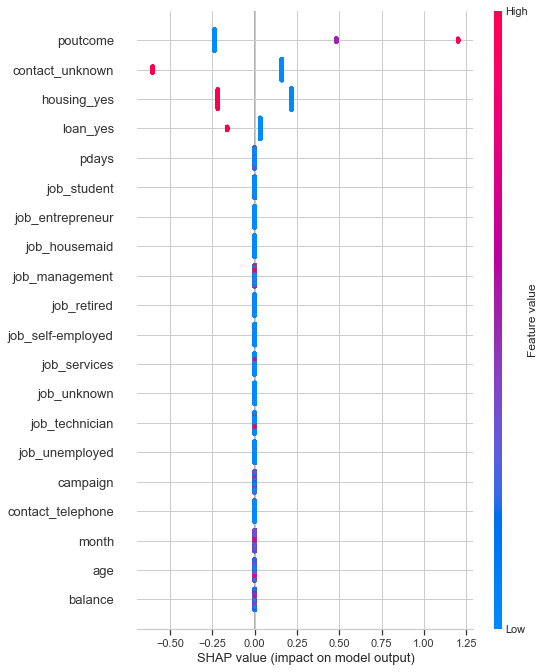

In [223]:
# tampilkan dalam bentuk plot                                 
shap.summary_plot(shap_values, my_data, feature_names=feat)

- Semakin tinggi value contact__unkown, maka semakin tinggi kemungkinan customer untuk tidak melakukan deposit. 
- Semakin tinggi value housing__yes maka semakin tinggi kemungkinan customer untuk tidak melakukan deposit. 
- Semakin tinggi value loan__yes maka semakin tinggi kemungkinan customer untuk tidak melakukan deposit.
- Semakin tinggi value poutcome maka semakin tinggi kemungkinan customer untuk melakukan deposit.
- Sedangkan untuk feature-feature lainnya tidak terdapat perbedaan yang signifikan untuk customer yang melakukan deposit dan tidak melakukan deposit bedasarkan SHAP value yang ditapilkan untuk feature value low dan high.


### SHAP untuk 1 data point (1 baris)(akan dicoba pada X_test indeks 0)

In [224]:
X_test.iloc[[0]]

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome
4499,55,services,2166,yes,no,unknown,may,17,0,unknown


In [225]:
#value sebennarnya dari y_test pada indeks 0 (adalah 0 --> Tidak deposit)
target_value = y_test[0]
target_value

0

In [226]:
# Start js (wajib dimiliki)
shap.initjs()

In [227]:
def shap_plot(index, model, dataframe):

    explainerModel = shap.LinearExplainer(model)
    shap_values_Model = explainerModel.shap_values(dataframe)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[index], dataframe.iloc[[index]])

    return(p)

In [228]:
# hanya menerima bentuk dataframe
X_test_prep = pd.DataFrame(logreg_tuning[0].transform(X_test), columns=feat)

In [229]:
y_test

array([0, 1, 0, ..., 1, 1, 0])

In [230]:
y_test[0]

0

In [231]:
def shap_plot(index, model, dataframe):

    # define explainer
    explainer_shap = shap.LinearExplainer(
    model= my_model,
    data= my_data,
    masker=masker
    
    # feature_dependence= 'independent',
    # model_output= 'probability'
)
    shap_values_Model = explainer_shap.shap_values(dataframe)
    p = shap.force_plot(explainer_shap.expected_value, shap_values_Model[index], dataframe.iloc[[index]])

    return(p)

In [232]:
# hanya menerima bentuk dataframe
X_test_prep = pd.DataFrame(logreg_tuning[0].transform(X_test), columns=feat)

In [233]:
# Membandingkan dengan hasil aslinya
print(f"Prediksi ini harus memprediksi customer: {('Deposit' if target_value == 1 else 'Tidak Deposit')} --> (Ini adalah y_test)")

shap_plot(
    index= 0, 
    model= my_model, 
    dataframe= X_test_prep_df
)


Prediksi ini harus memprediksi customer: Tidak Deposit --> (Ini adalah y_test)


- Untuk y_test indeks nol dengan deposit = 0. Prediksinya betul sesuai dengan y_test actual dimana customer tidak melakukan deposit
- Maka dapat diinterpretasikan bahwa ketika value loan__yes = 0 customer cenderung melakukan deposit
- Ketika contact_unkown = 1 (alat komunikasi telemarketing kepada customer tidak diketahui), dan poutcome(0 --> ini berarti poutcome unkown/other) dan housing__yes (memiliki housing loan) maka customer cenderung tidak melakukan deposit. 
Probability untuk customer dengan indeks 0 ini untuk tidak melakukan deposit > probability untuk melakukan deposit

**Kesimpulan**

- Model terbaik yang saya dapatkan setelah melalui proses cross validation adalah Logitic Regression dengan dengan nilai f2 score sebesar 66%
- Setelah hyperparameter tuning untuk hyperparameter logistic regression didapatkan hyperparam best estimator sebagai berikut:
    - {'model__C': 0.01,
    - 'model__class_weight': {0: 1, 1: 2},
    - 'model__penalty': 'l1',
    - 'prep__robust': MinMaxScaler()}
- Hyperparam diatas merupakan model logistic regression yang memiliki skor f2 0.8040207356798131
- feature-feature paling pentingnya sebagai berikut:
    - poutcome , Customer dengan poutcome = 2 memiliki persentase deposit paling tinggi. Ketika value poutcome semakin tinggi maka semakin tinggi kecenderungan customer untuk melakukan deposito
    - contact_unknown, ketika value contact_unkown semakin tinggi maka semakin tinggi kecenderungan customer untuk tidak melakukan deposito
    - housing_yes, ketika value housing_yes semakin tinggi maka semakin tinggi kecenderungan customer untuk tidak melakukan deposito
    - loan_yes, ketika value loan__yes semakin tinggi maka semakin tinggi kecenderungan customer untuk tidak melakukan deposito
    - month, bulan december, maret, october dan september memiliki persentase deposit yang paling tinggi dibandinhkan bulan lainnya. 
- Feature-feature yang paling tidak mempengaruhi target adalah: job, balance, age, campaign, pdays dan contact__telephone
- Setelah melalui proses optimisasi threshold didapatkan nilai threshold terbaik 0.5 yang memiliki f2 skor terbaik:0.817610	 dengan profit yang didapatkan sebesar $54.725. dengan kriteria sebagai berikut:
    - recall:0.944818
    - precision:0.531416
- Kita telah berhasil menekan nilai false negative sehingga nilai recall pun meningjat hingga 0.94 dengan nilai precision yang juga cukup tinggi sebesar 0.53
- Model machine learning berhasil menigkatkan keuntungan sebesar 54725-54085= $640.



Kelebihan jika menggunakan model Logistic Regression:
- Model ini computationally efficient(tidak membutuhkan waktu lama untuk memproses model).
- Mudah untuk diinterpretasi yaitu dengan mengetahui mana feature dengan coefficient yang paling tinggi nilainya sehingga dapat disimpulkan bahwa feature tersebut sangat penting dan mempengaruhi model yang kita buat. 

Kelemahan model machine leraning yang kita buat:
 - Model ini hanya dapat memprediksi dengan baik data dengan:
    - range umur rata-rata tersebar pada range 32-49. Umur minimum customer adalah 18 tahun dan umur maksimum customer adalah 95 tahun 
    - Balance dari customer  yang tersebar pada range $133-$1694. Balance maksimum adalah sebesar $66653 dan Balance minimum adalah sebesar -$6847
    - Jumlah campaign yang tersebar dari 1-3 kali. Dengan campaign paling banyak dilakukan sebanyak 63 kali. 
    - 50% dari kolom pdays yang mengacu pada waktu terakhir sejak telemarketing menghubungi customer memiliki nilai 0(angka 0 berarti customer melakukan konfirmasi untuk melakukan deposit/tidak di hari yang sama dengan hari telemarketing menghubungi customer). 
    - Customer rata-rata langsung melakukan deposit di hari yang sama sejak hari terakhir customer dihubungi (mengacu pada kolom pdays). Namun ada customer yang melakukan deposit 854 hari setelah dihubungi oleh telemarketing. 



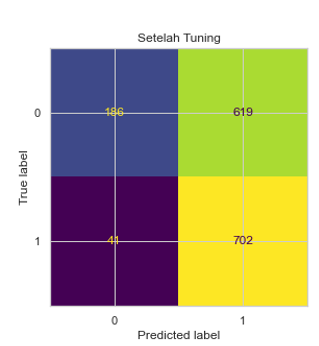

In [235]:
image = Image.open("threshold 0.5.png")  


display(image)

**Rekomendasi Bisnis**
- Team telemarketing dapat menggunakan model logistic regression dengan threshold 0.5 untuk mendapatkan profit yang paling maksimal yaitu $54725. 
dengan keuntungan setelah menggunakan model ML dengan threshold terbaik yaitu 0.50: 
    - cost untuk marketing:
        - $25x(619+702) = $33025
    - Keuntungan yang didapat dari deposito:
        - $125x702 = $87750
Maka keuntungan yang didapat dari deposito customer dikurang dengan cost marketing untuk optimized threshold 0.5:$54725<br>
Selain itu ada beberapa masukkan yang dapat dilakukan untuk team telemarketing:
    - Tingkatkan Keterlibatan Pelanggan: Tingkatkan keterlibatan pelanggan dengan personalisasi interaksi dan komunikasi. Manfaatkan data pelanggan untuk memahami preferensi, kebutuhan, dan perilaku mereka. Sesuaikan pesan dan tawaran pemasaran berdasarkan informasi ini untuk meningkatkan minat pelanggan dan tingkat respons. Ini bisa menjadi feature tambahan pada data customer machine learning kita misal ketika kita menegtahui :
        - **marital status** dari customer(married, single, divorced) ini bisa menajdi feature tambahan apakah masing2 karakteristik ini cenderung untuk melakukan deposit atau tidak
        - **default** dari customer apakah customer pernah gagal bayar atau tidak
        - **education** dari customer yang menunjukkan tingkat pendidikan dari customer
    - Retensi Pelanggan: Fokus tidak hanya pada perolehan pelanggan baru, tetapi juga retensi pelanggan yang sudah ada. Tim telemarketing jangan sampai lalai dengan menghubungi customer dengan range waktu yang tidak terlalu lama dari jarak waktu antara campaign pertama dan campaign selanjutnya hingga berbulan-bulan(Namun perlu diingat jangan terlalu sering juga campaignnya jumlah campaignnya). 
<br>
**Rekomendasi model**
- Pihak yang ingin melanjutkan pekerjaan ini dapat melakukan gridsearch dengan range parameter yang lebih luas pada model saya karena saya memiliki ketertabatasan komputasi untuk melalukan gridsearch ataupun library lain seperti optuna (Optuna ini lebih efisien dalam menentukan hyperparaneter yang optimal dan tidak membutuhkan waktu komputasi yang lama)
- Selain itu, dapat juga digunakan algoritma lainnya seperti Support Vector Machine yang memmiki kelebihan curse of dimensionality atau mampu menghandle data dengan dimensi tinggi, mampu mengatasi overfitting serta dapat mengubah data yang tidak linier menjadi linier terpisah dengan kernel trick.